## Setup working directory

In [1]:
%cd ../src

e:\00_CODE\03_Master_Thesis\rdf-literal-preprocessing\src


## Load dataframe

In [2]:
import os
import numpy as np
import re
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

#df = pd. 

print('pykeen file does not exist. Writing pykeen file...')
df = pd.DataFrame(columns=["full_name","f1_macro","f1_micro"])
        
dfs = []
i = 0
for entry in os.listdir('../data/predicted/'):
    results = np.loadtxt(f'../data/predicted/{entry}', dtype=np.int32, delimiter=',')
    i+=1
    dfs.append(pd.DataFrame(
        [[
            entry,
            f1_score(results[0],results[1],average='micro'),
            f1_score(results[0],results[1],average='macro'),
        ]],
        columns=["full_name","f1_macro","f1_micro"]
    ))


df = pd.concat(dfs,ignore_index=True)
df['base_name']= df['full_name'].str.extract(r'(.*)\$[0-9]+\.csv')
df = df.groupby('base_name').mean().round(3)
df = df.reset_index()
df['dataset']= df['base_name'].str.extract(r'(.*?)\+.*')
df['eval_method']= df['base_name'].str.extract(r'.*\$([A-Z]+)')
df['steps'] = df['base_name'].str.findall(r'\+(.*?)-')
df['steps'] = [', '.join(map(str, l)) for l in df['steps']]
df['embedder'] = df['base_name'].str.extract(r'\$(.*?)\$')
df = df.drop(columns='base_name')


pykeen file does not exist. Writing pykeen file...


C:\Users\Noctris\AppData\Local\Temp\ipykernel_21968\1908857062.py:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('base_name').mean().round(3)


## Inspect H1

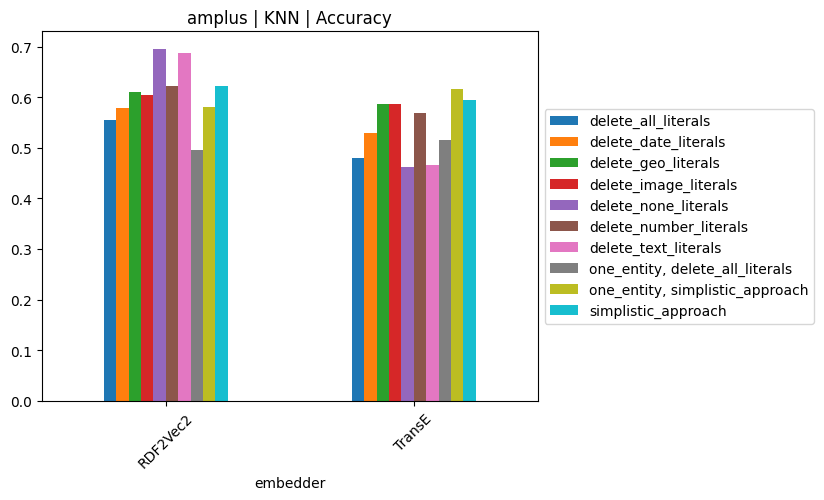

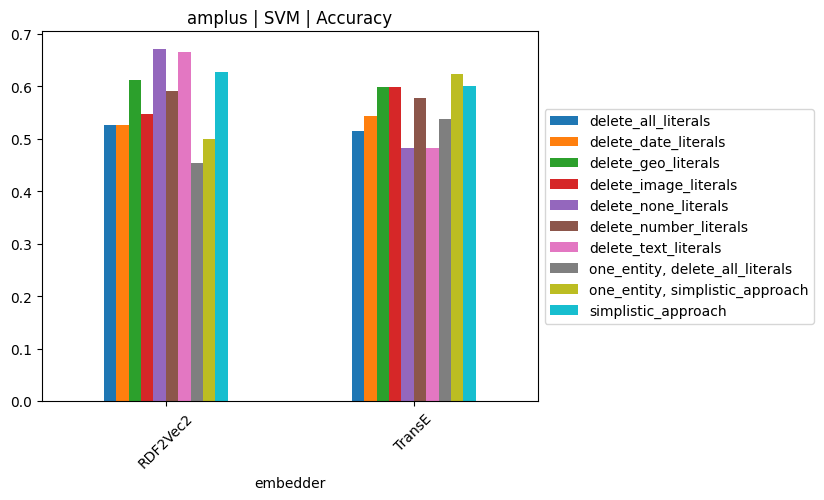

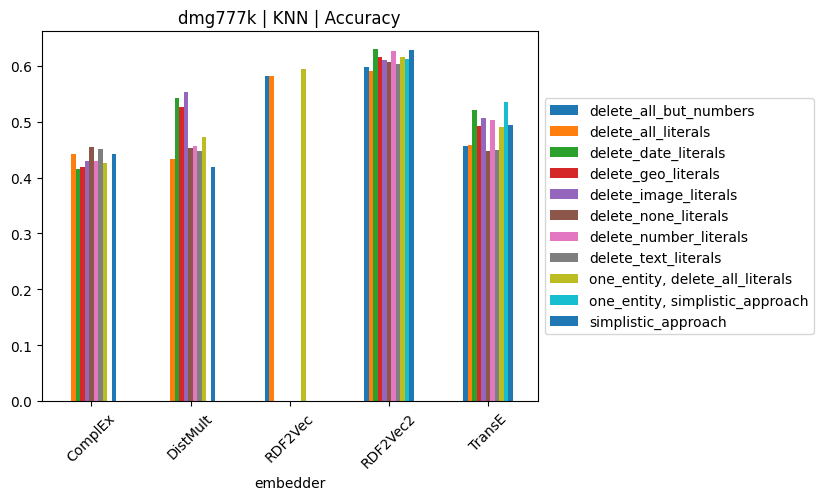

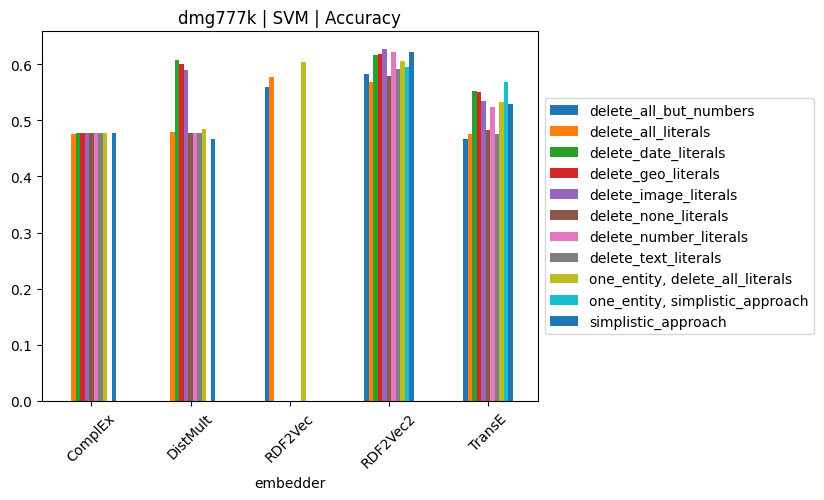

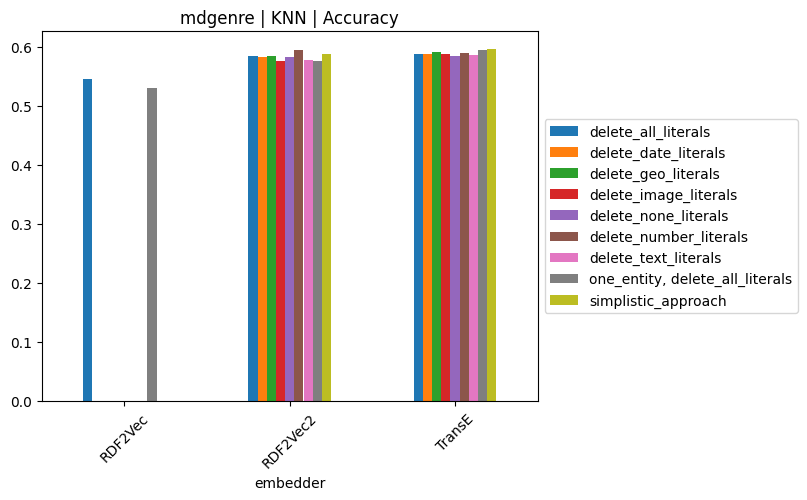

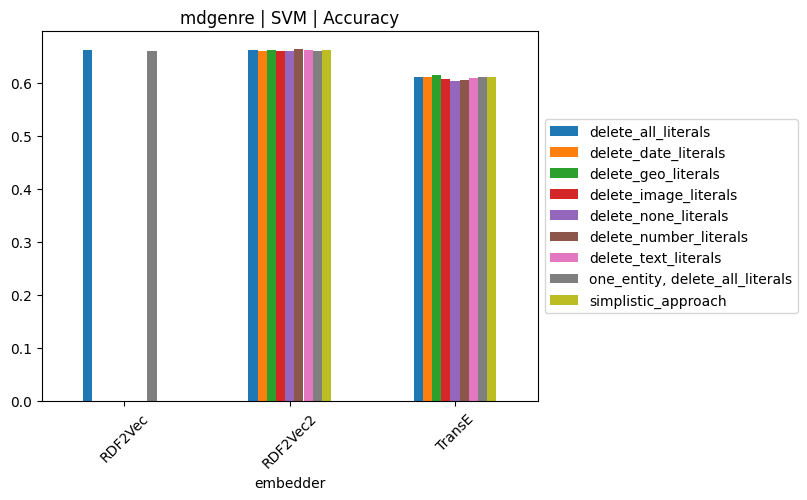

In [3]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(one|delete|do_nothing|simplistic).*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(one|delete|do_nothing|simplistic).*'))],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | Accuracy').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

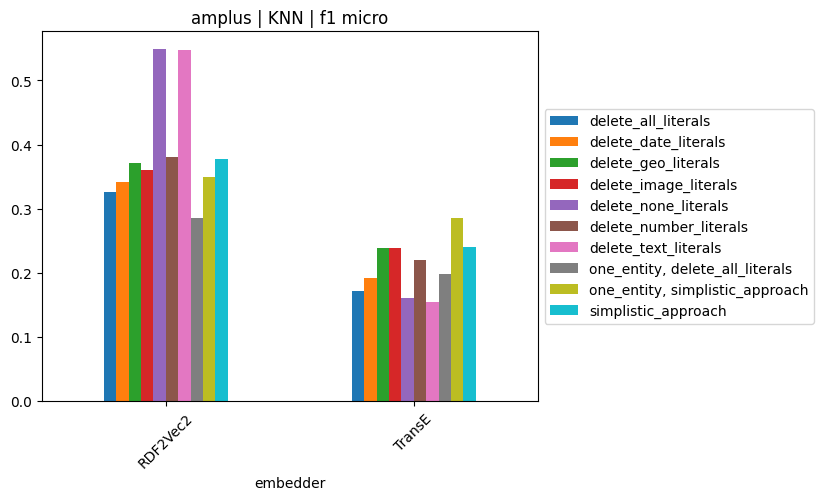

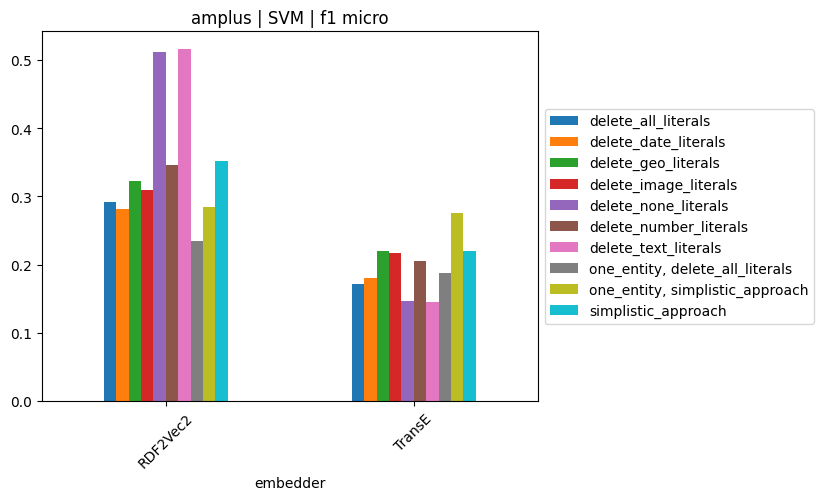

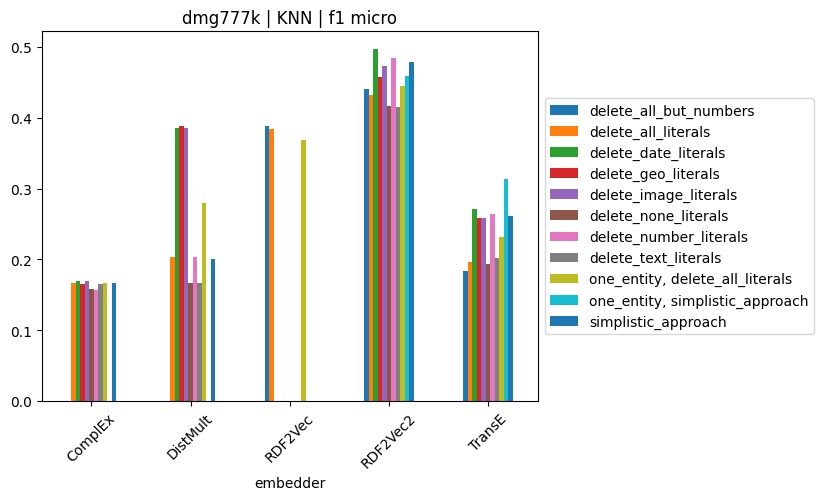

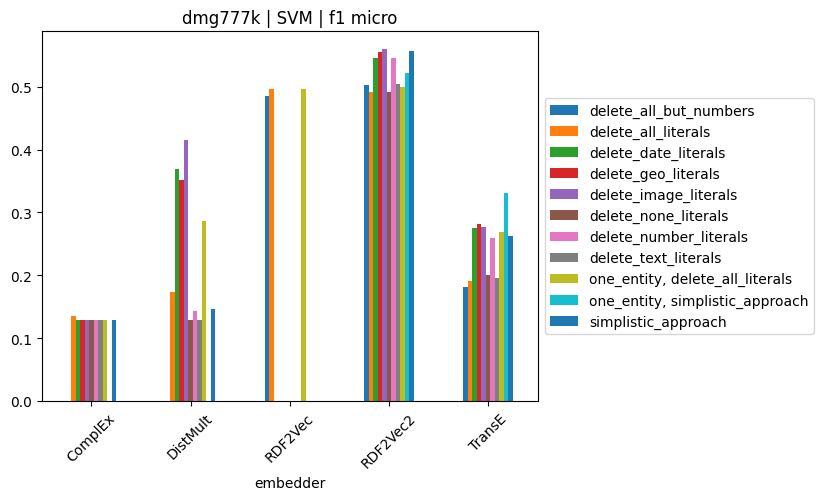

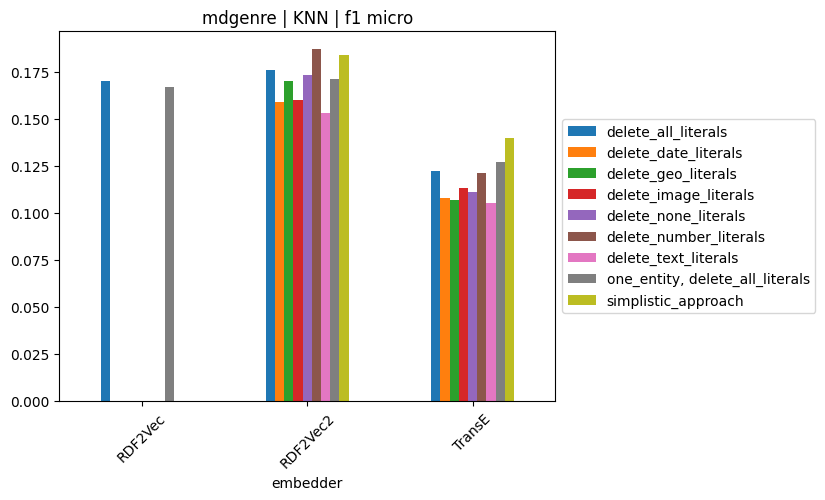

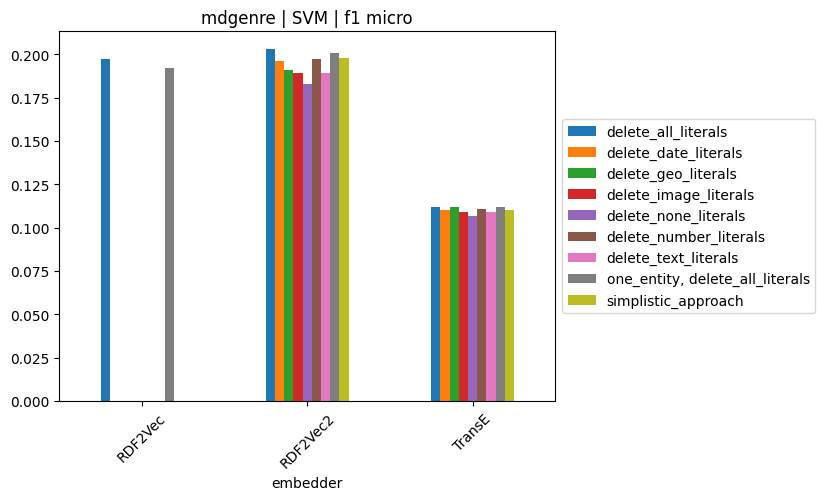

In [4]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(one|delete|do_nothing|simplistic).*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(one|delete|do_nothing|simplistic).*'))],
               index='embedder', columns=['steps'],values='f1_micro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | f1 micro').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

## Inspect Binning

In [5]:
df[(df['dataset']=='amplus') ].f1_macro

0      0.677
1      0.664
2      0.461
3      0.491
4      0.564
       ...  
137    0.597
138    0.621
139    0.607
140    0.573
141    0.579
Name: f1_macro, Length: 142, dtype: float64

In [6]:
for dataset in df['dataset'].unique():
    df[(df['dataset']=='amplus') &(df['embedder'] != 'RDF2Vec2') ]

In [7]:
df[(df['dataset']=='amplus')&(df['embedder'] != 'RDF2Vec2') ].sort_values(by=['f1_macro'],ascending=False).head(10)

f1_macro  f1_micro dataset eval_method  \
123     0.623     0.276  amplus         SVM   
31      0.622     0.268  amplus         SVM   
122     0.616     0.285  amplus         KNN   
30      0.615     0.297  amplus         KNN   
7       0.609     0.230  amplus         SVM   
75      0.607     0.233  amplus         SVM   
6       0.605     0.264  amplus         KNN   
59      0.604     0.228  amplus         SVM   
39      0.603     0.224  amplus         SVM   
74      0.602     0.250  amplus         KNN   

                                                 steps embedder  
123                    one_entity, simplistic_approach   TransE  
31   bin_numbers_hierarchically_3_10_100, simplisti...   TransE  
122                    one_entity, simplistic_approach   TransE  
30   bin_numbers_hierarchically_3_10_100, simplisti...   TransE  
7                                       bin_numbers_10   TransE  
75       bin_numbers_percentage_3, simplistic_approach   TransE  
6                                       bin_numbers_10   TransE  
59   bin_numbers_lof_percentage_3, simplistic_approach   TransE  
39             bin_numbers_lof_10, simplistic_approach   TransE  
74       bin_numbers_percentage_3, simplistic_approach   TransE

In [3]:
import os
len(os.listdir('../data/predicted/'))

14

In [8]:
df.head(10)

f1_macro  f1_micro dataset eval_method  \
0     0.677     0.542  amplus         KNN   
1     0.664     0.501  amplus         SVM   
2     0.461     0.162  amplus         KNN   
3     0.491     0.148  amplus         SVM   
4     0.564     0.302  amplus         KNN   
5     0.602     0.297  amplus         SVM   
6     0.605     0.264  amplus         KNN   
7     0.609     0.230  amplus         SVM   
8     0.556     0.311  amplus         KNN   
9     0.541     0.299  amplus         SVM   

                                        steps  embedder  
0  LDA_topic_assignment, delete_text_literals  RDF2Vec2  
1  LDA_topic_assignment, delete_text_literals  RDF2Vec2  
2  LDA_topic_assignment, delete_text_literals    TransE  
3  LDA_topic_assignment, delete_text_literals    TransE  
4                              bin_numbers_10  RDF2Vec2  
5                              bin_numbers_10  RDF2Vec2  
6                              bin_numbers_10    TransE  
7                              bin_numbers_10    TransE  
8      bin_numbers_10, delete_number_literals  RDF2Vec2  
9      bin_numbers_10, delete_number_literals  RDF2Vec2

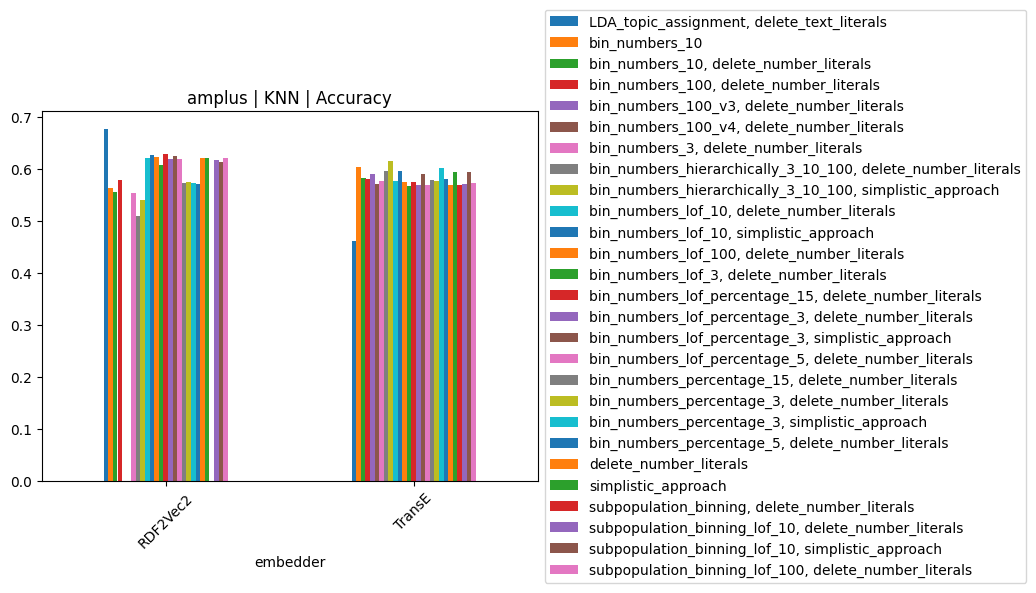

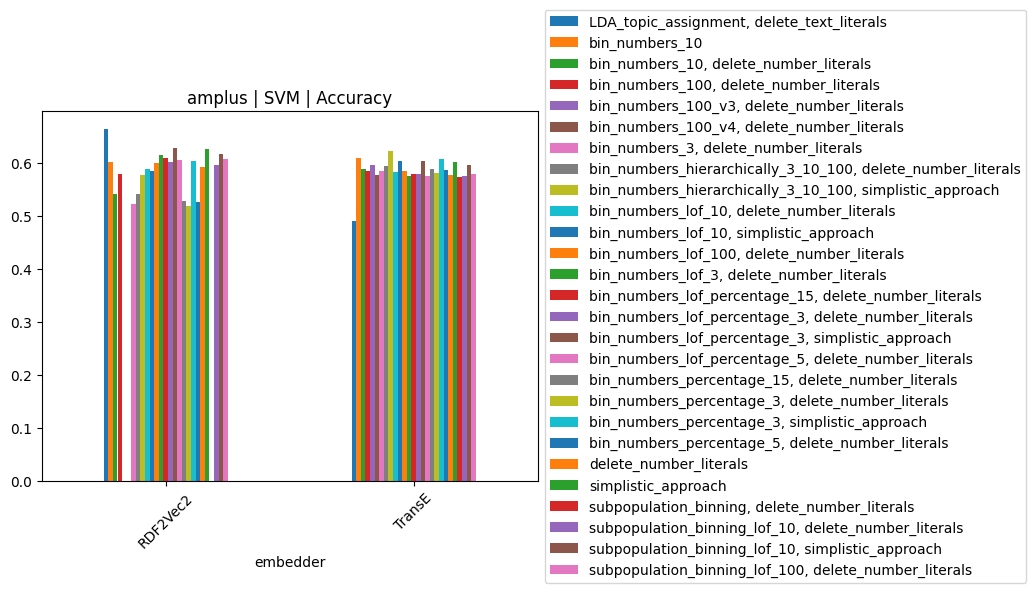

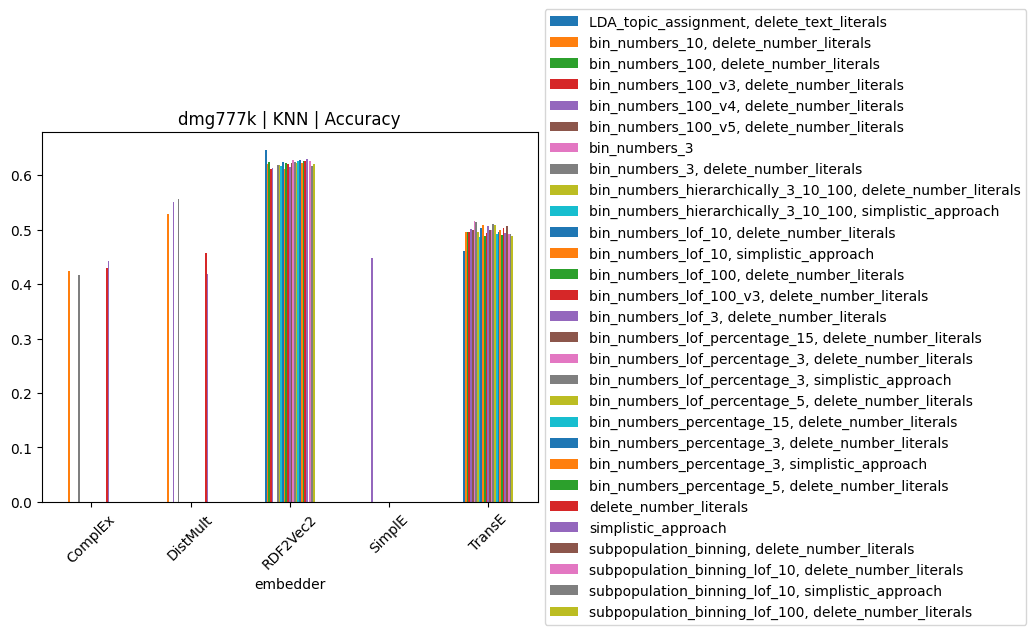

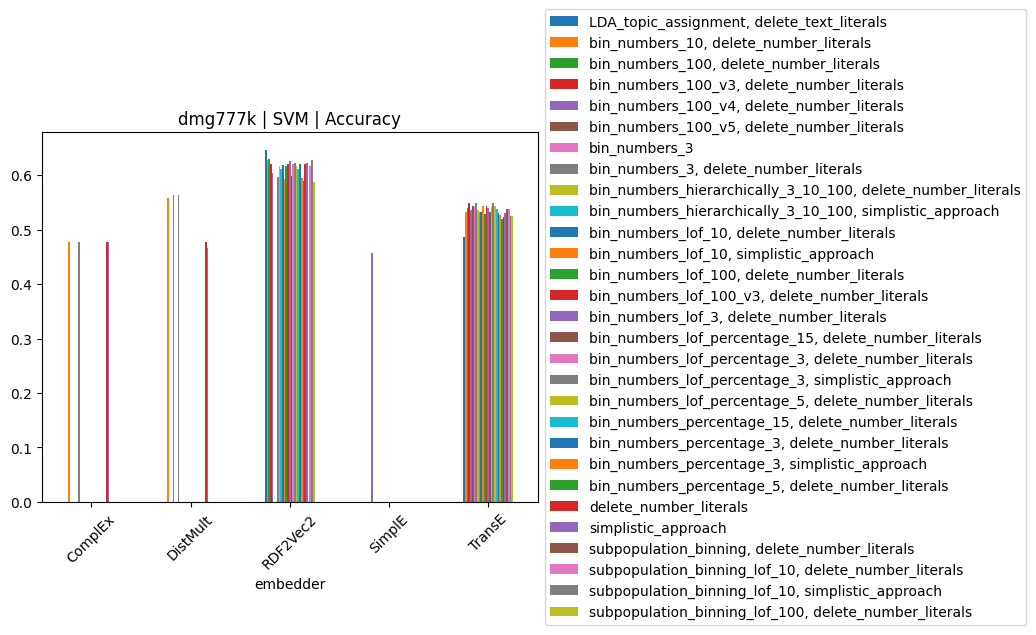

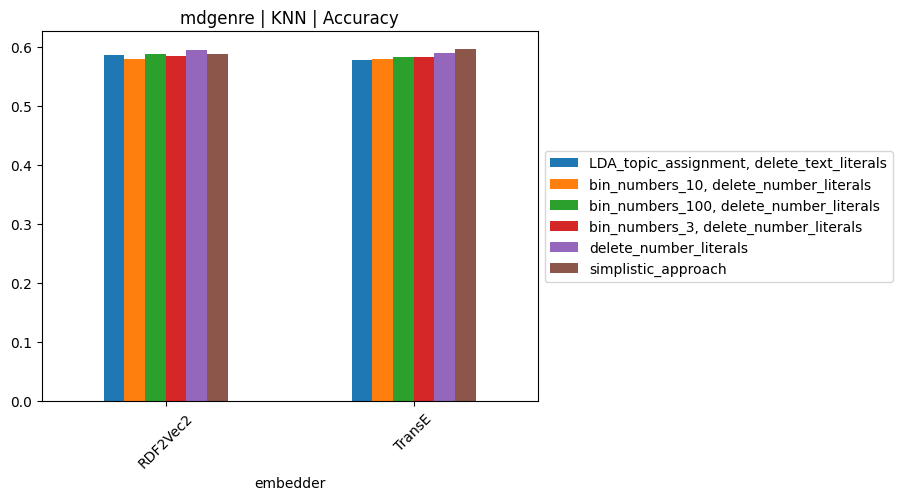

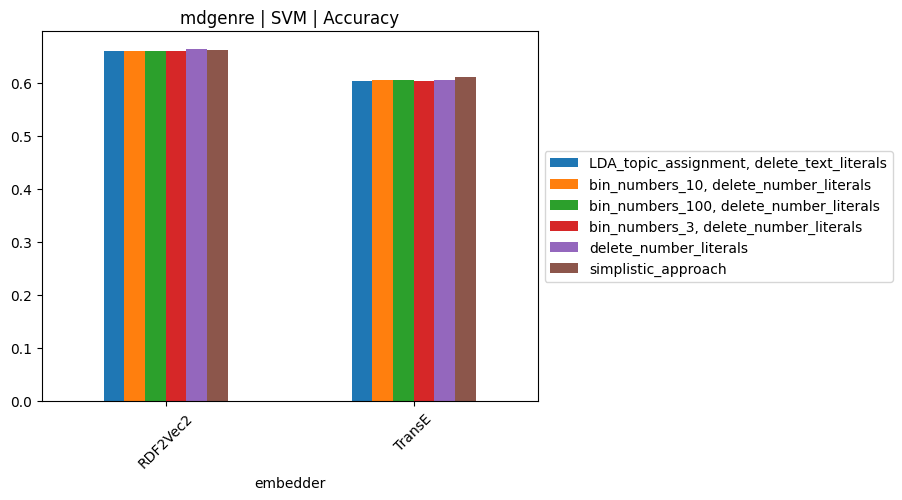

In [9]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(bin_numbers|delete_number|simplistic|sub|LDA).*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(bin_numbers|delete_number|simplistic|sub|LDA).*'))],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | Accuracy').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

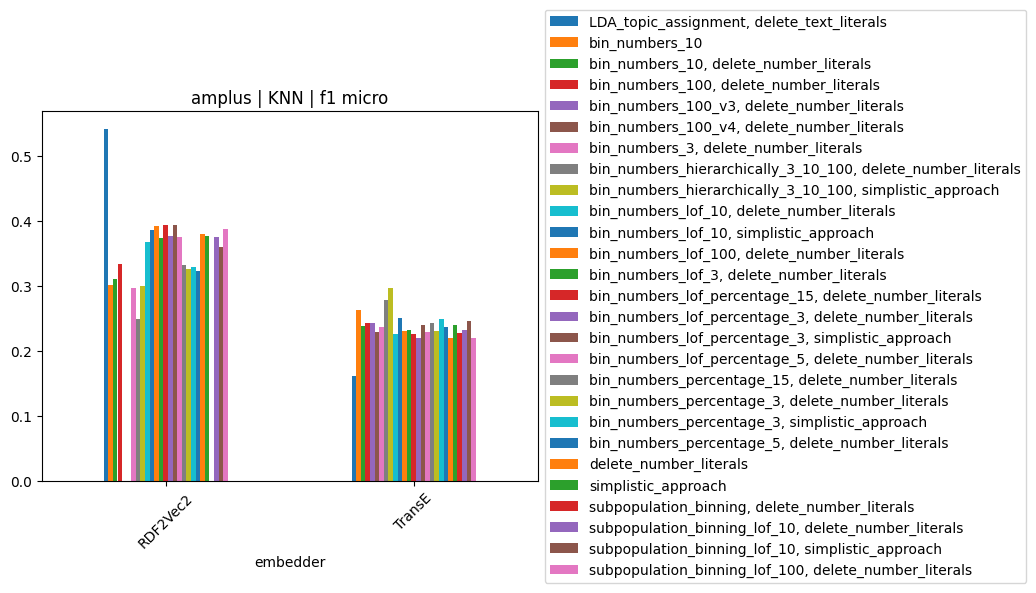

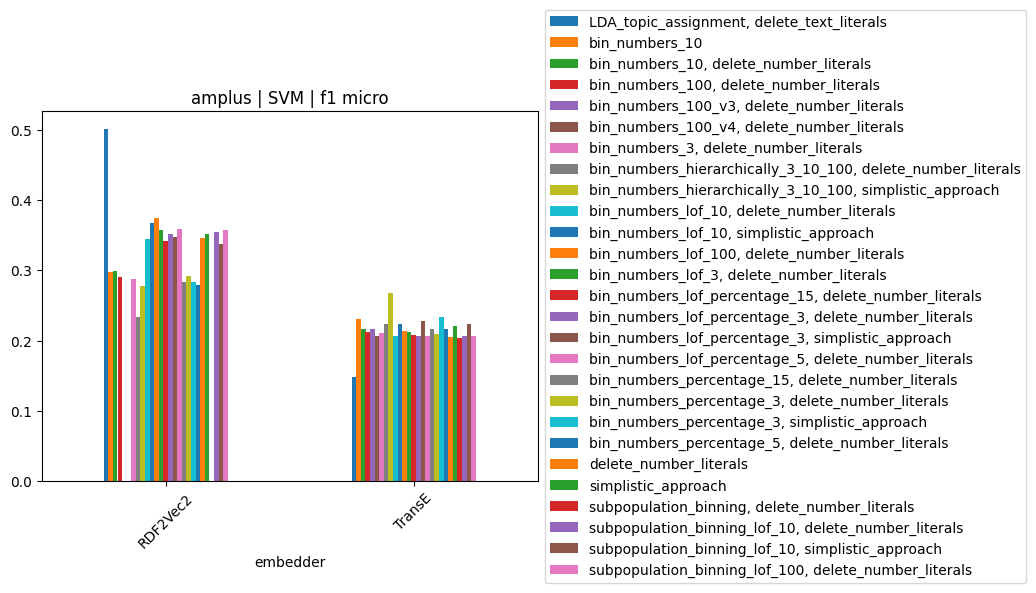

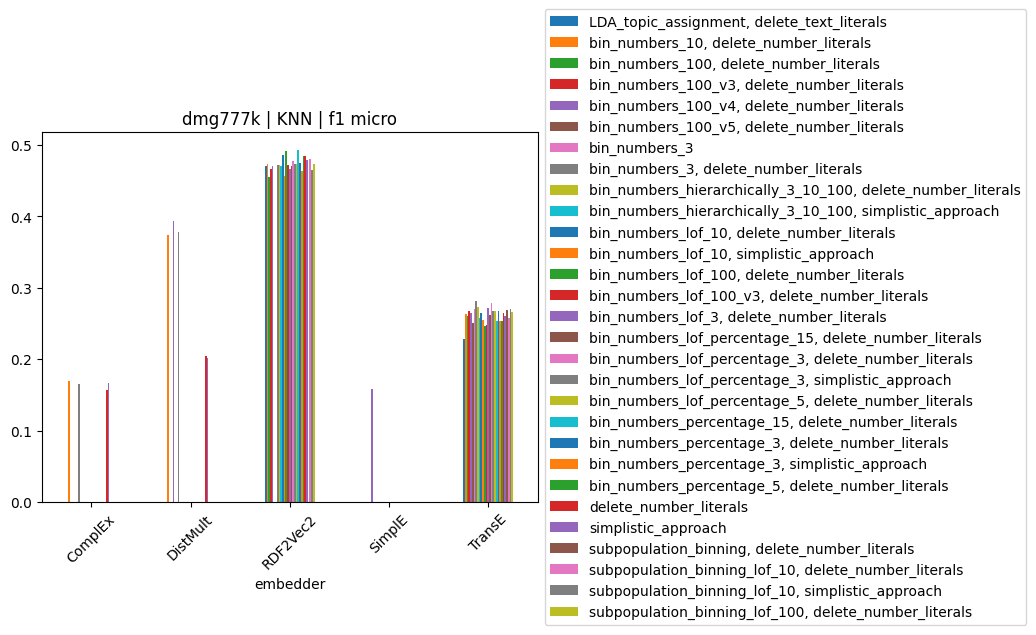

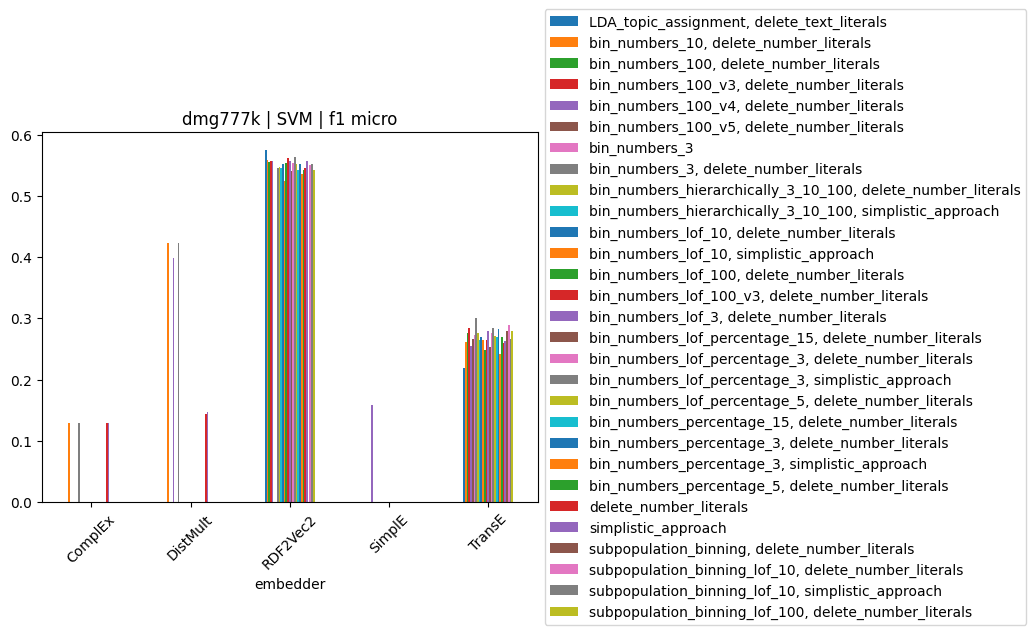

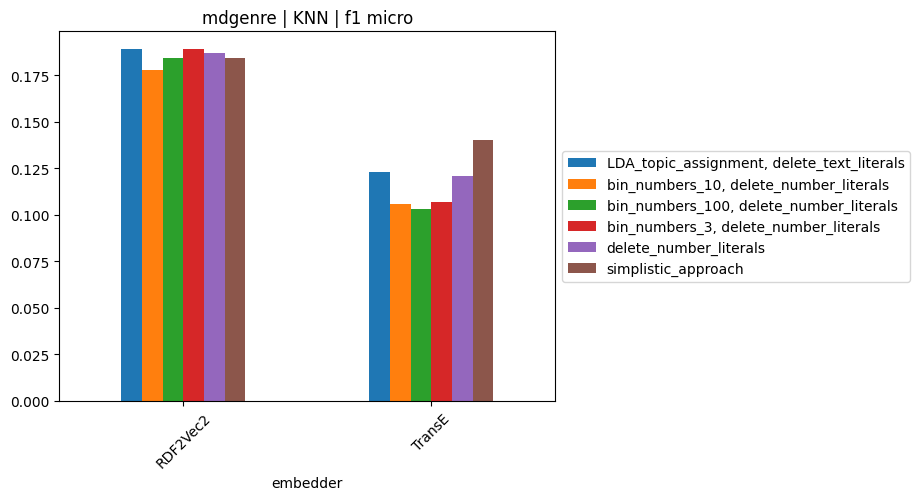

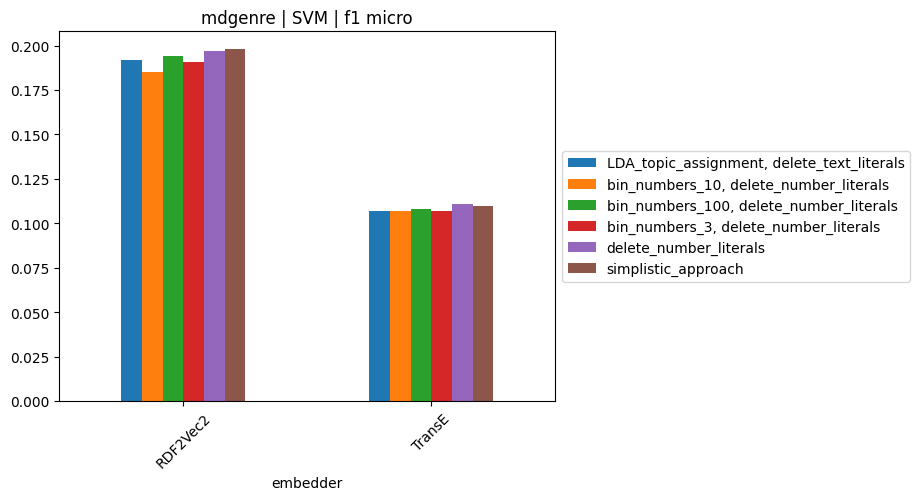

In [10]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(bin_numbers|delete_number|simplistic|sub|LDA).*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(bin_numbers|delete_number|simplistic|sub|LDA).*'))],
               index='embedder', columns=['steps'],values='f1_micro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | f1 micro').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

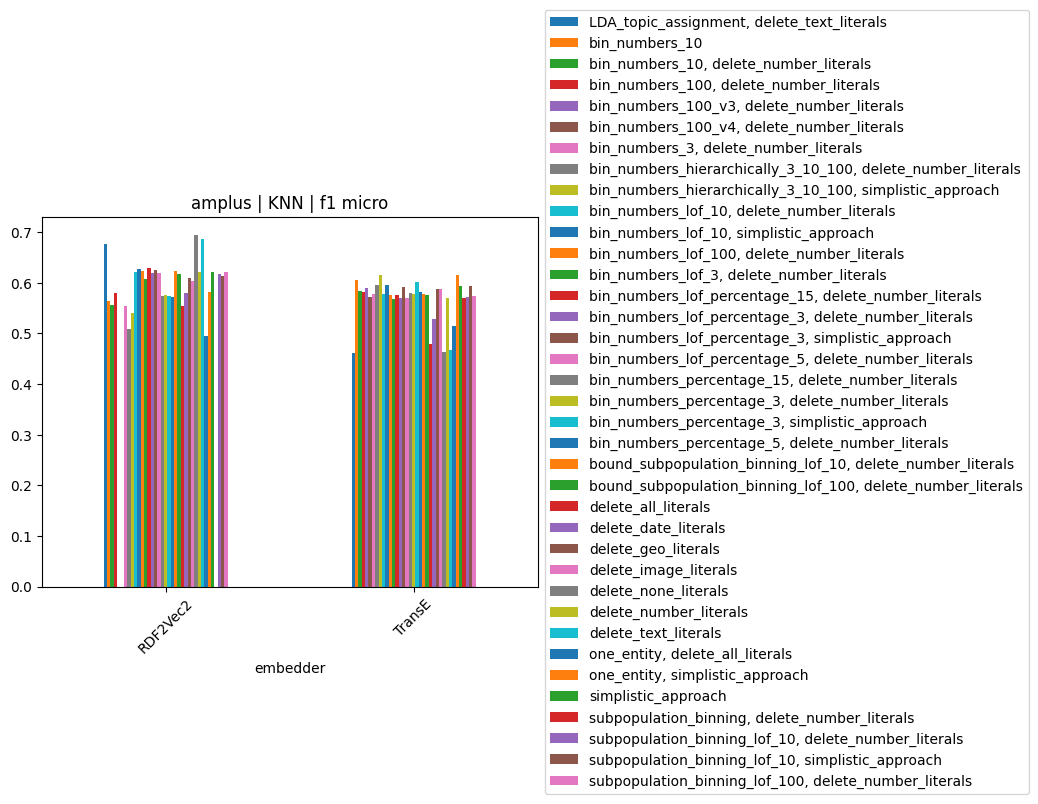

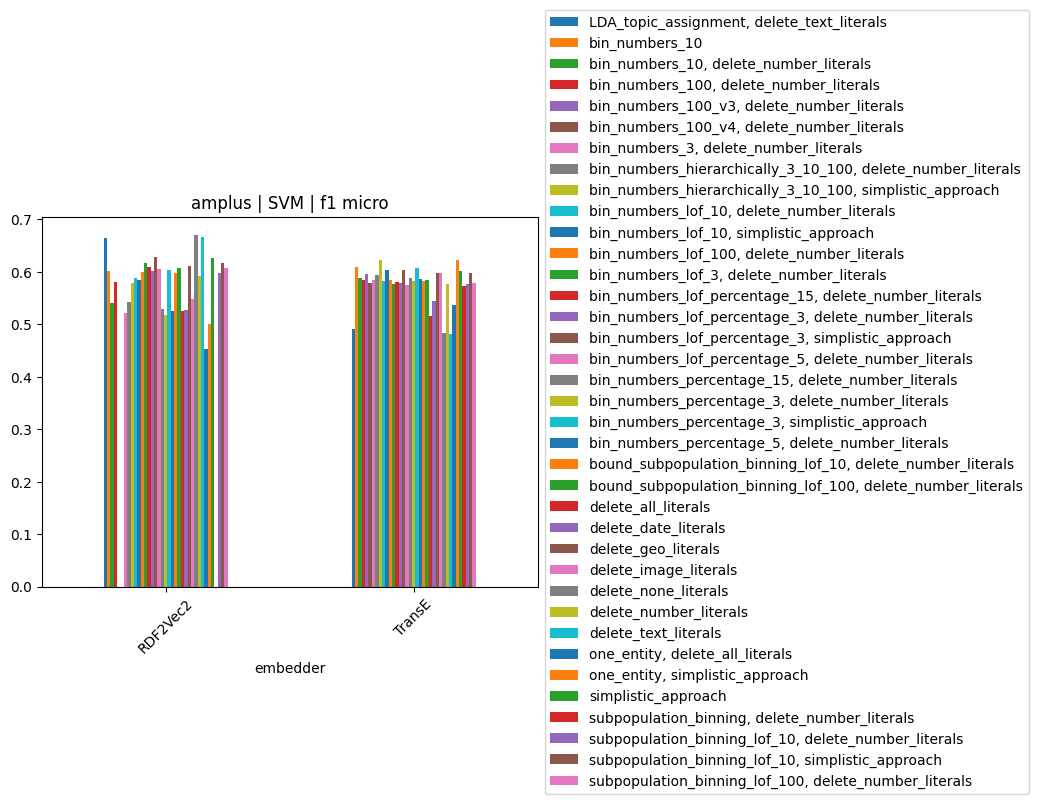

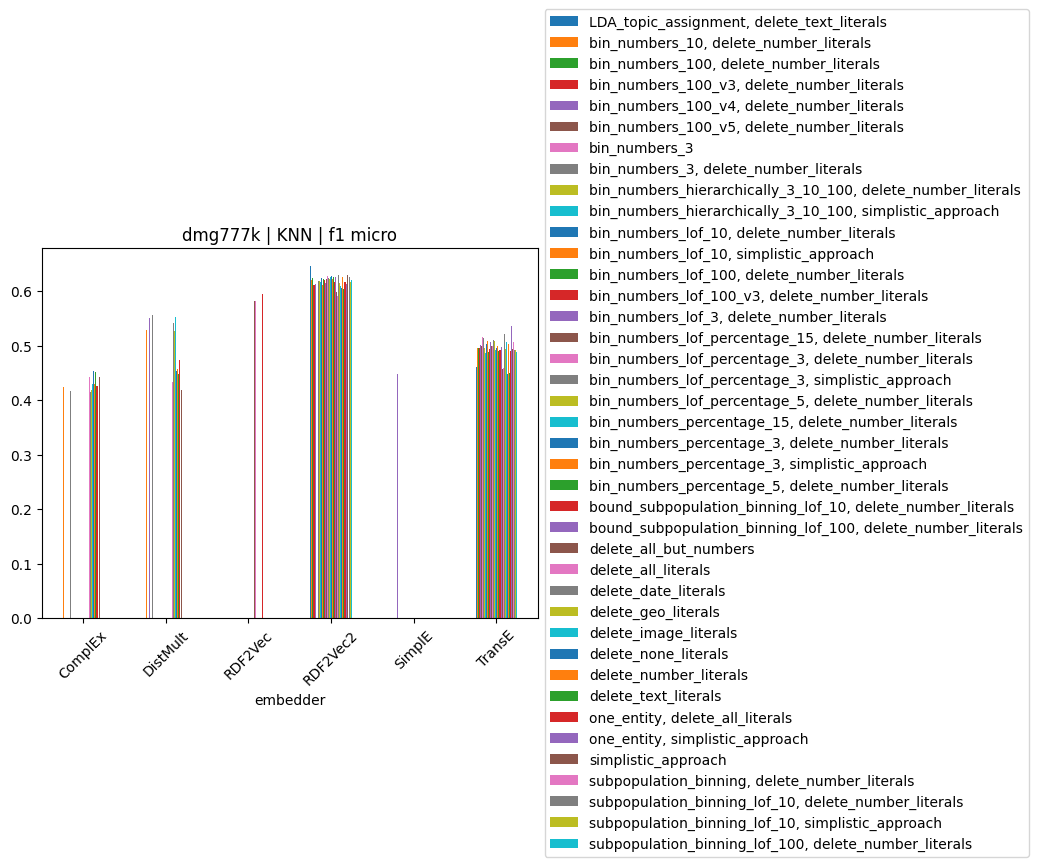

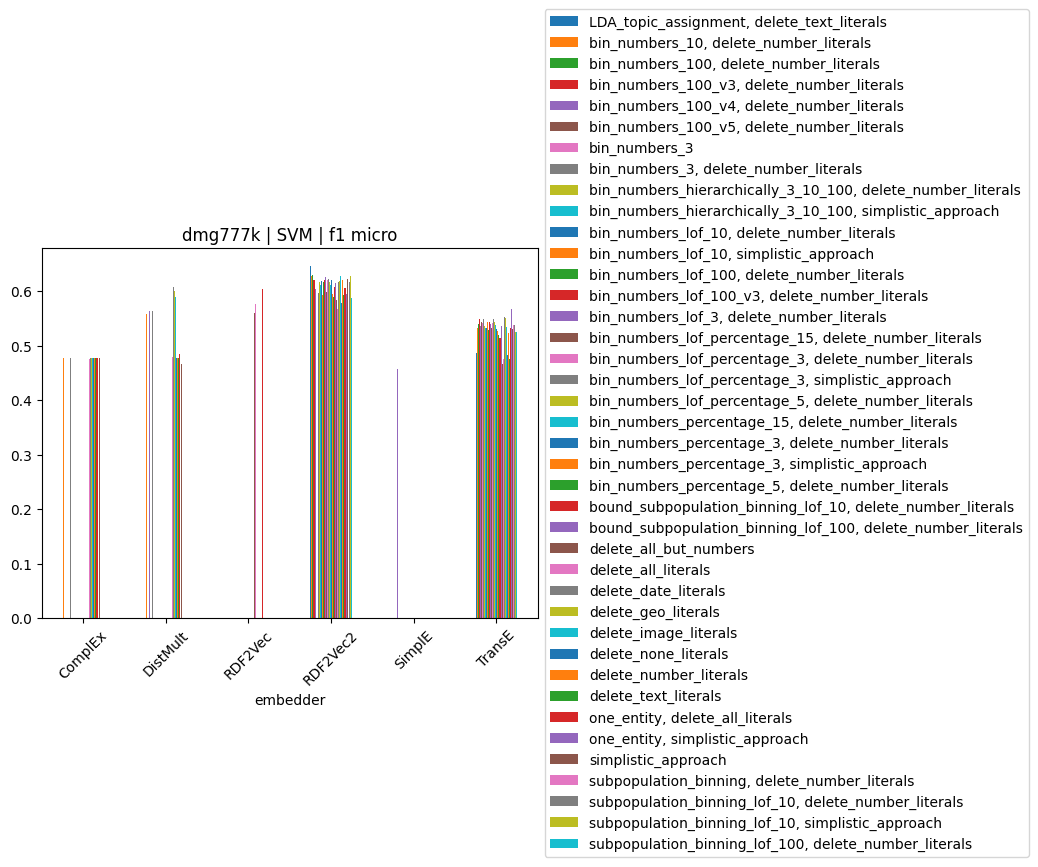

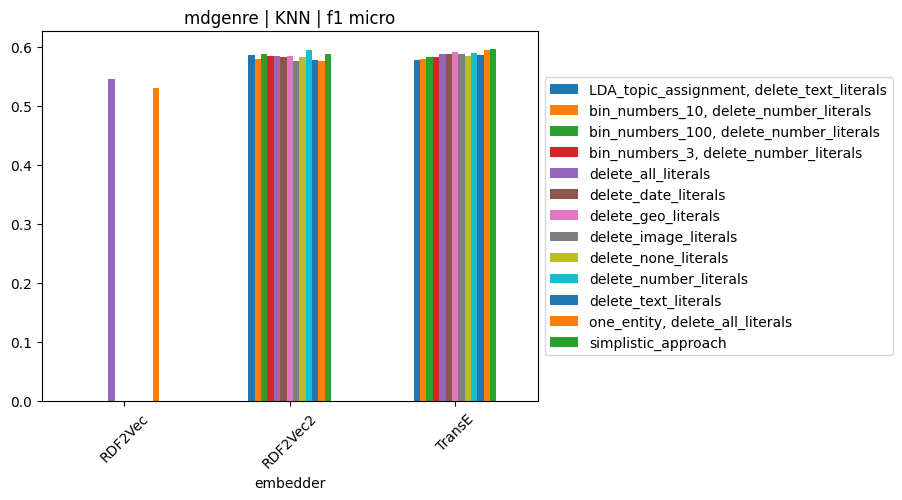

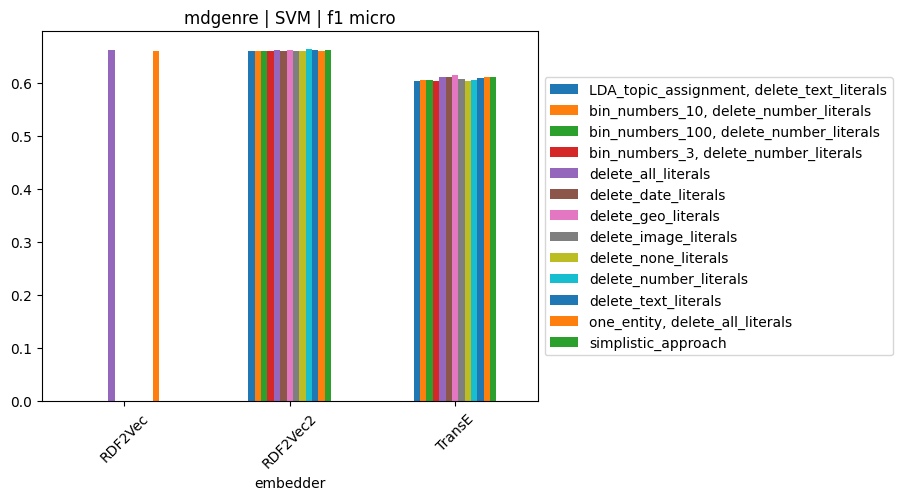

In [11]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) ]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) ],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | f1 micro').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

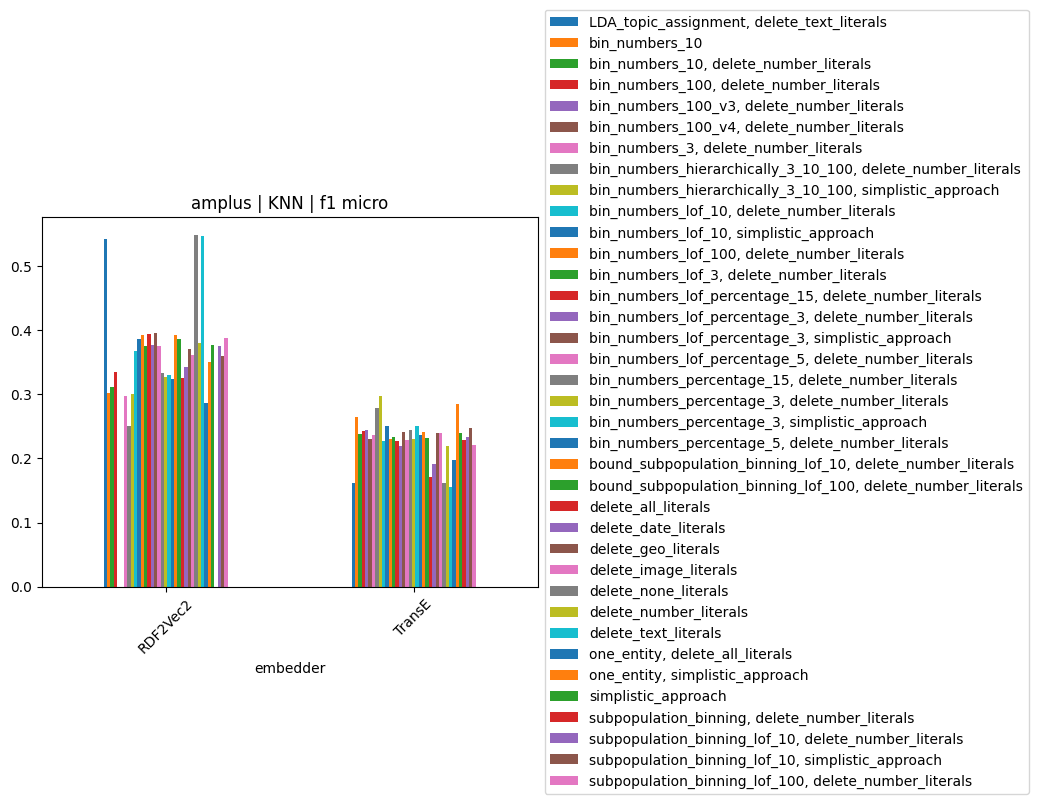

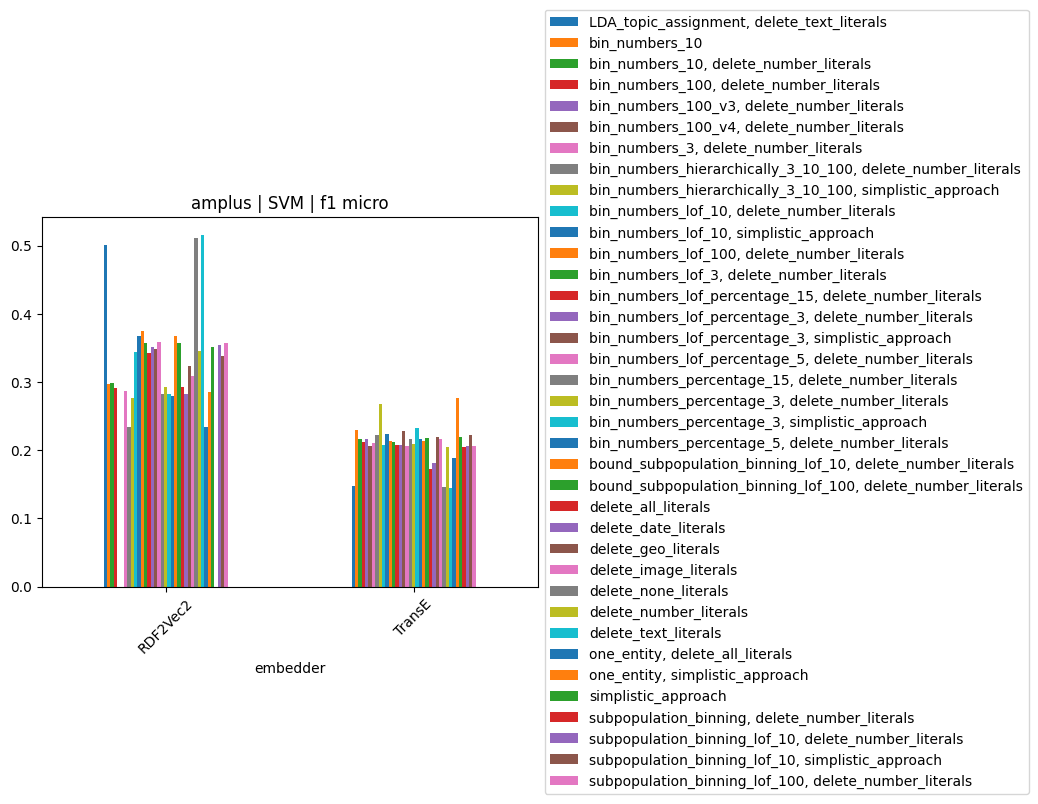

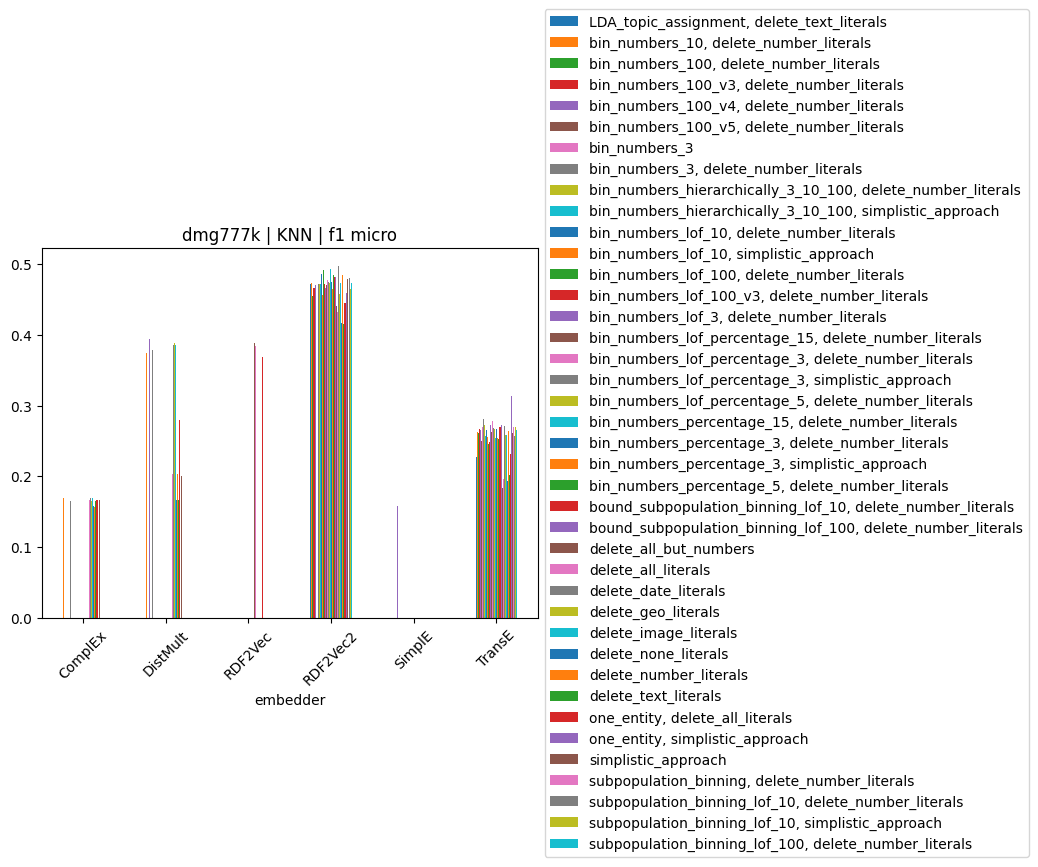

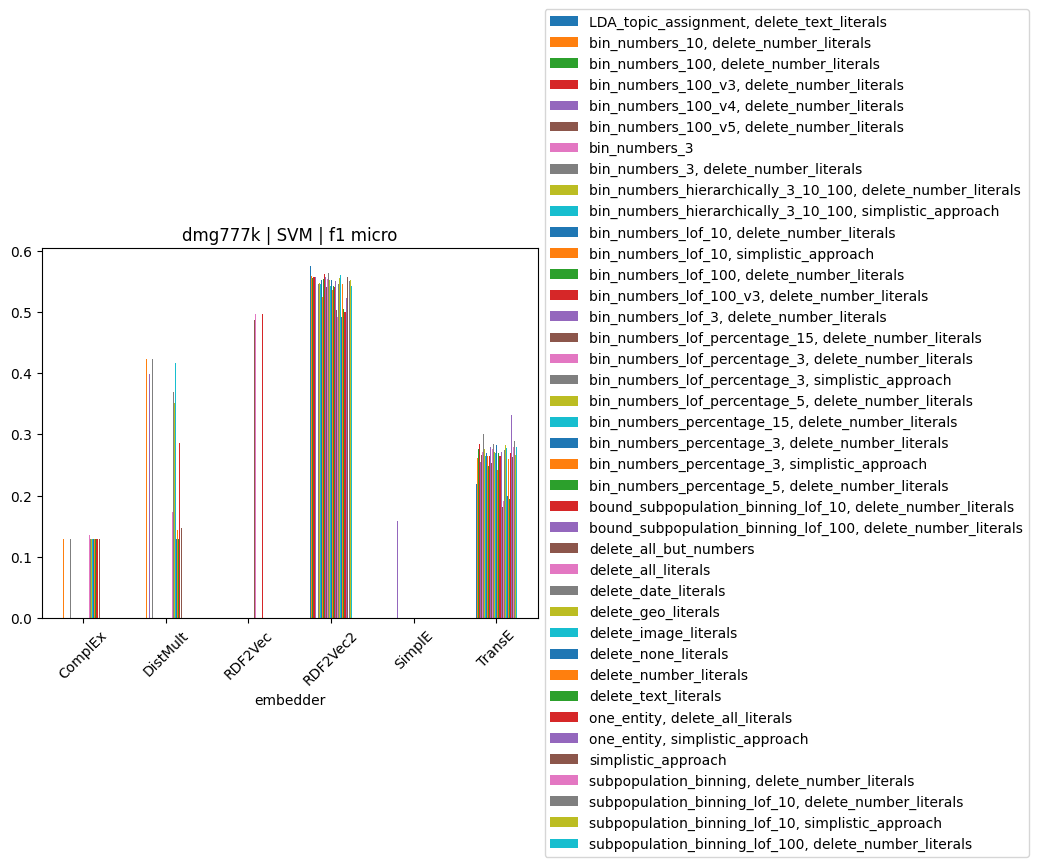

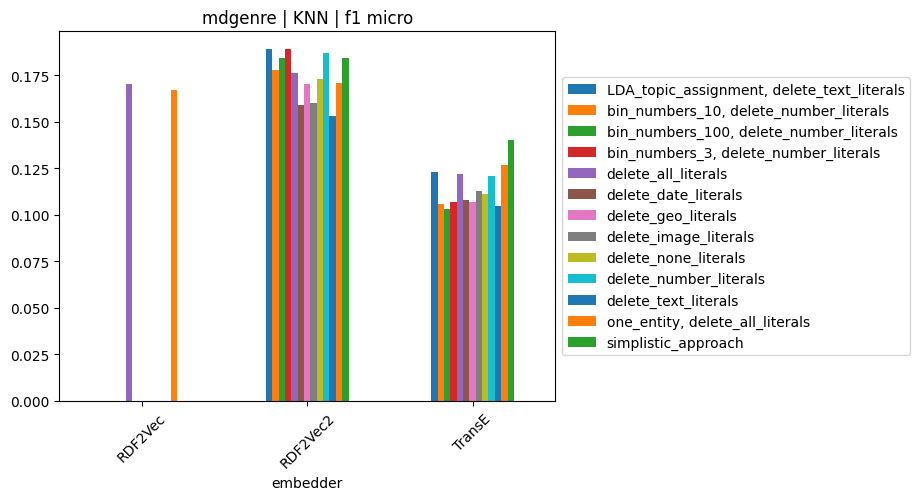

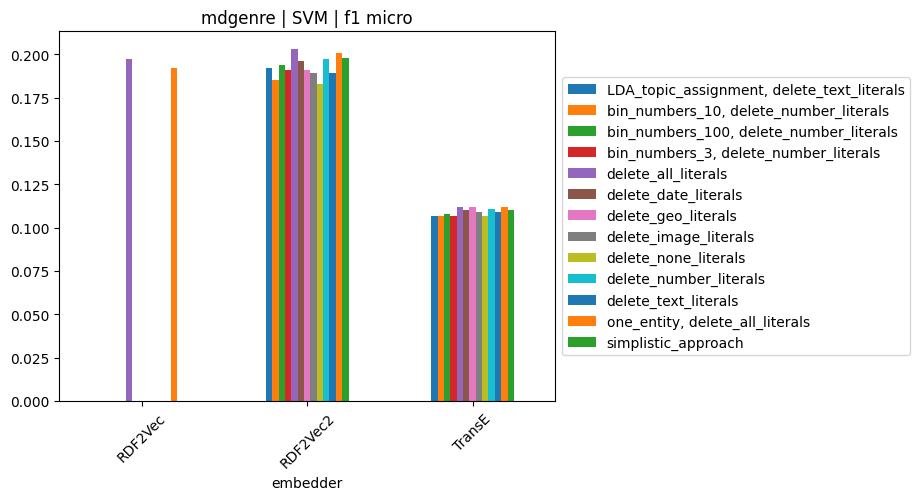

In [12]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) ]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) ],
               index='embedder', columns=['steps'],values='f1_micro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | f1 micro').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 06.04

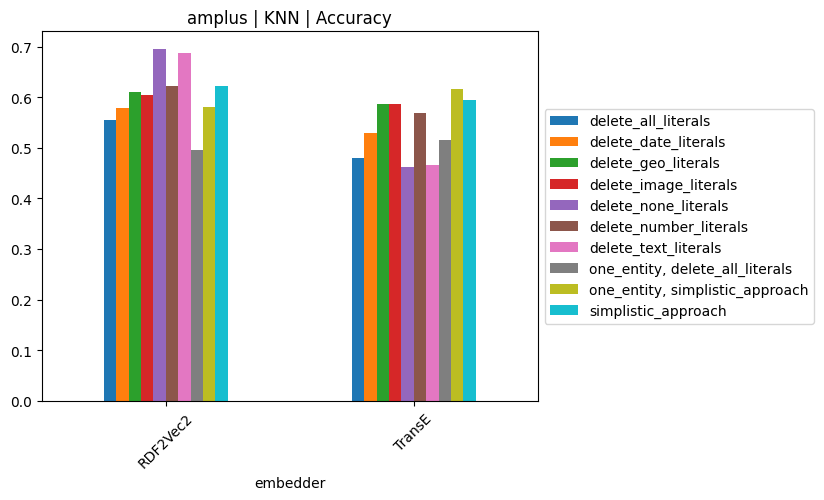

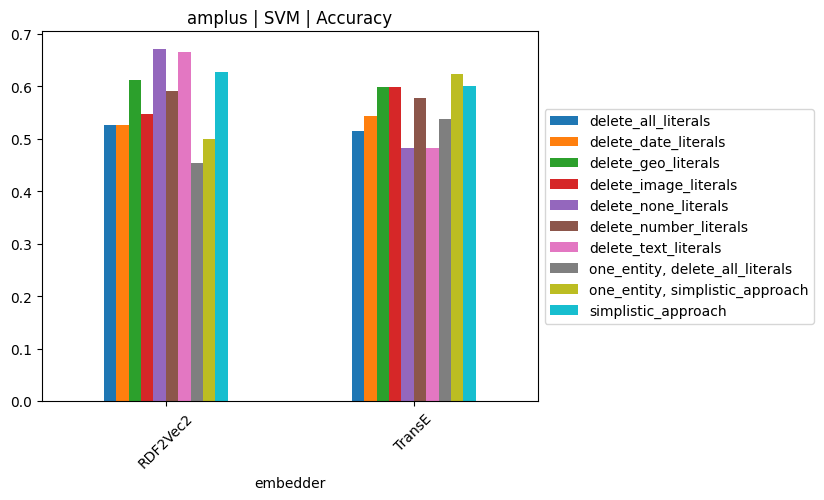

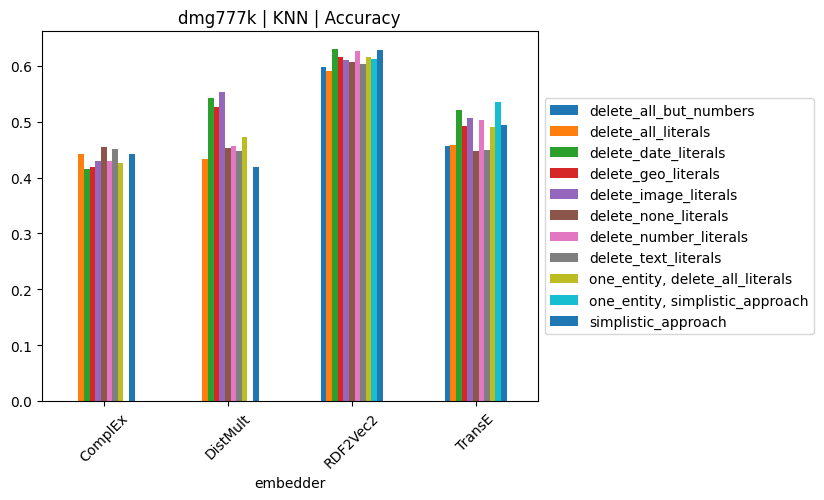

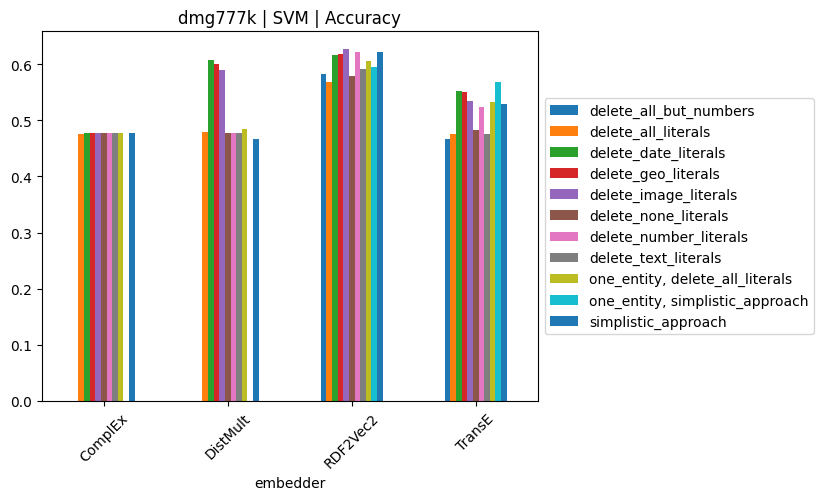

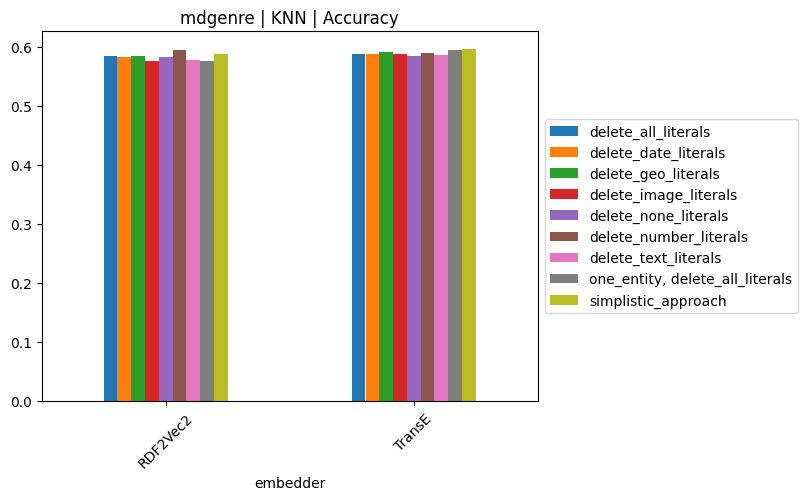

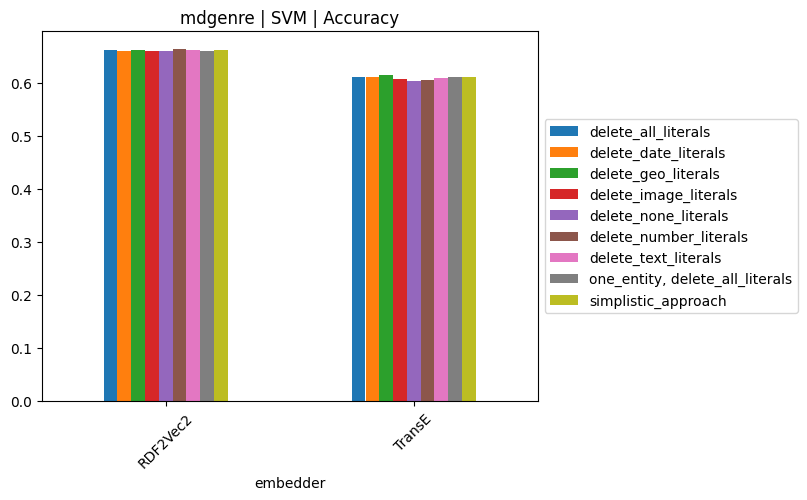

In [13]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(one|delete|simplistic).*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(one|delete|simplistic).*')) & (df['embedder'] != "RDF2Vec")],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | Accuracy').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

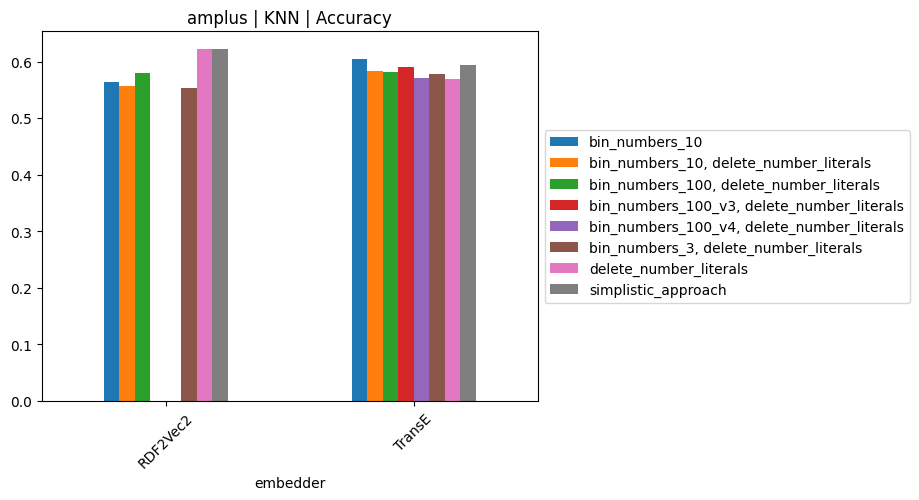

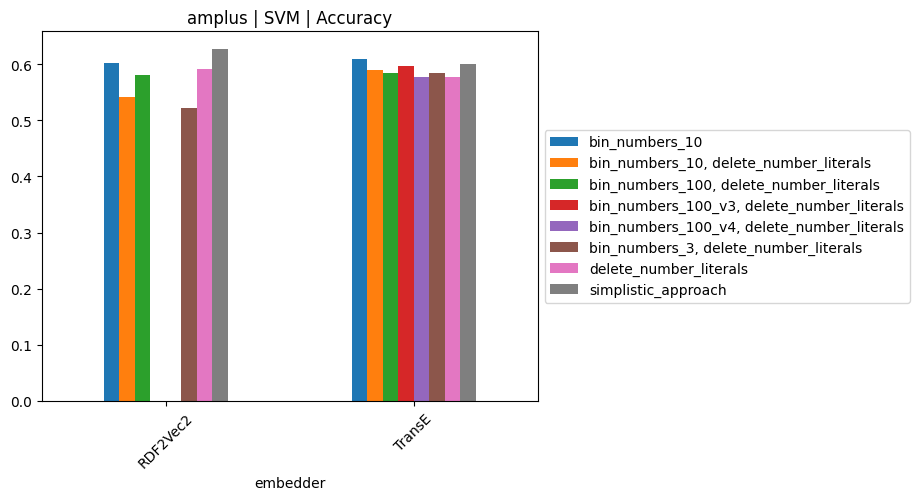

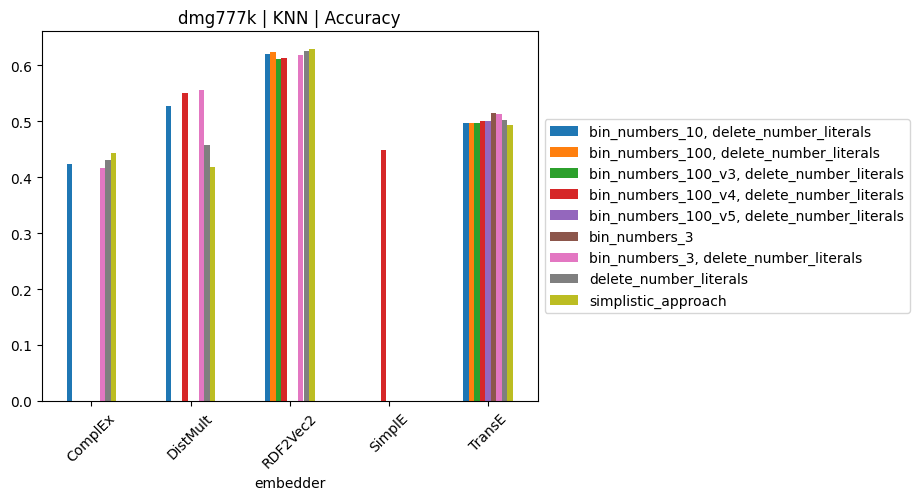

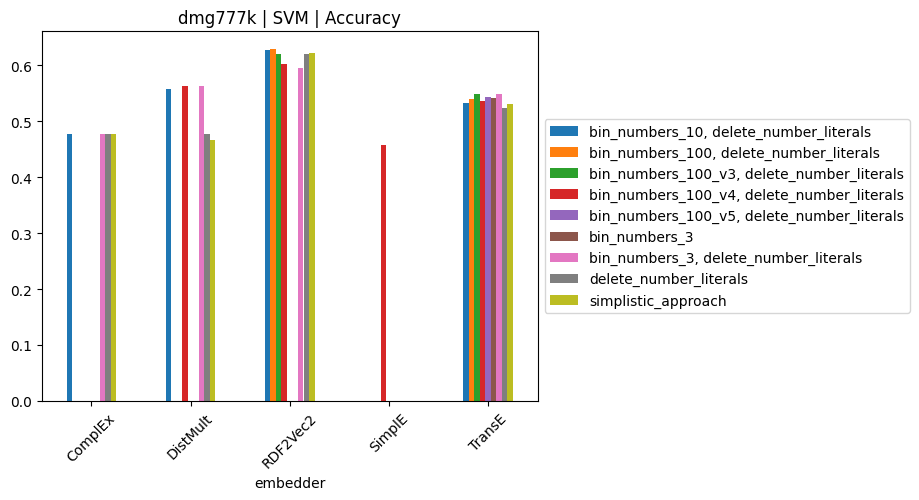

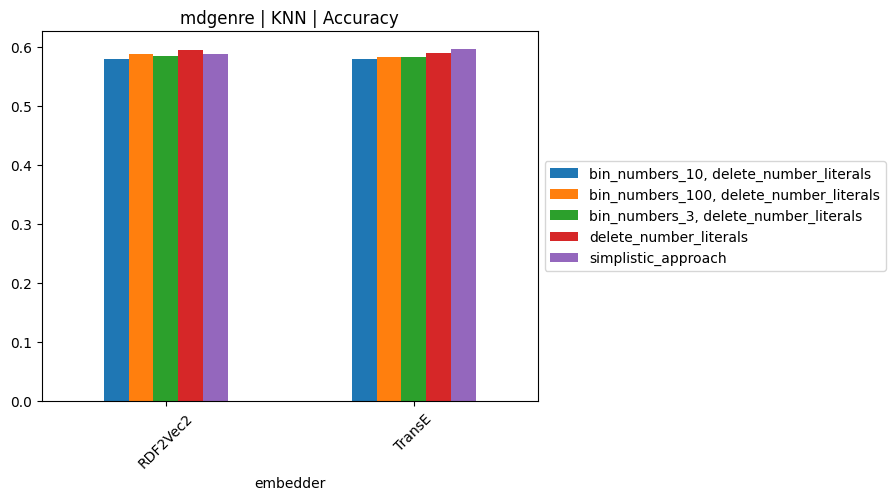

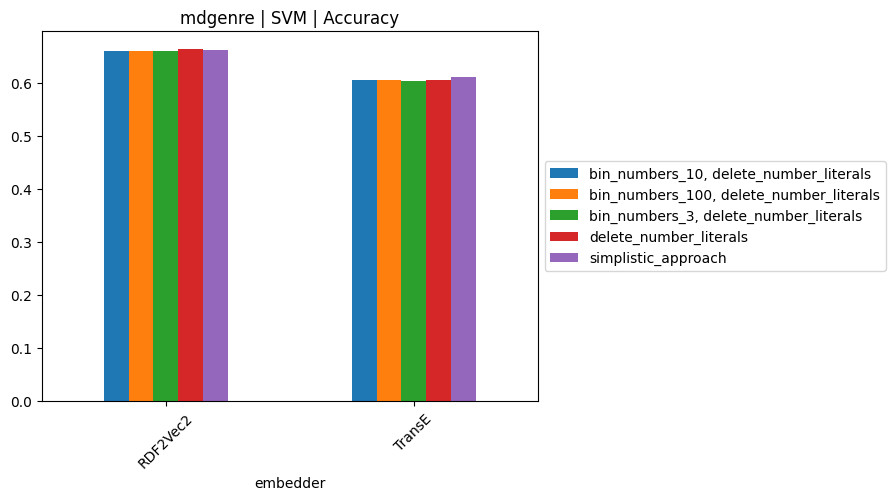

In [14]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((bin_numbers_)[0-9])+.*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((bin_numbers_)[0-9]|simpl|delete_num)+.*')) & (df['embedder'] != "RDF2Vec")],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | Accuracy').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

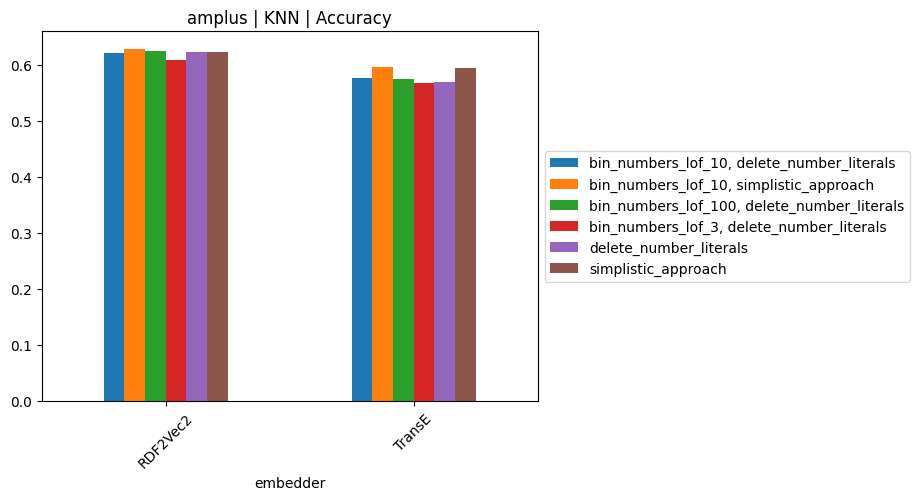

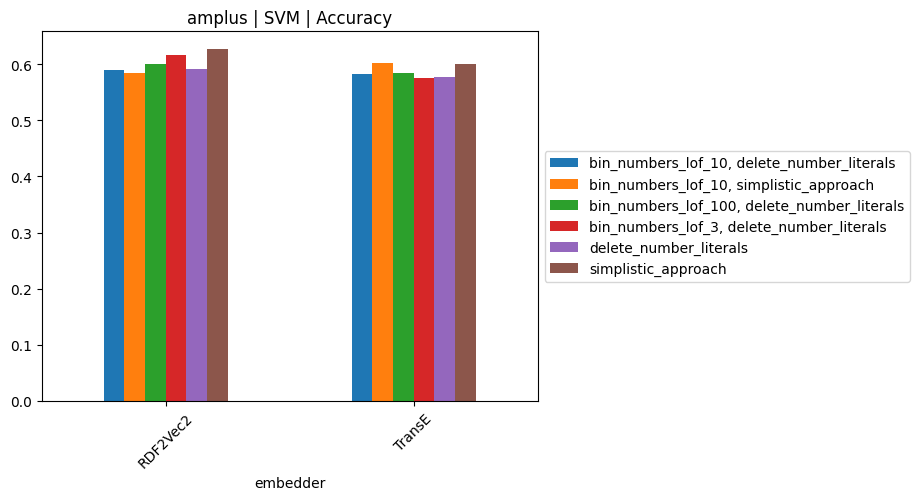

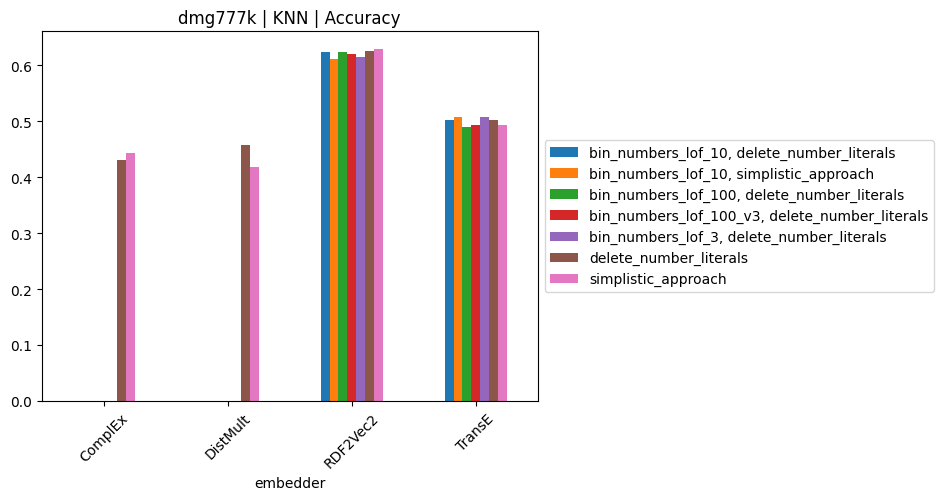

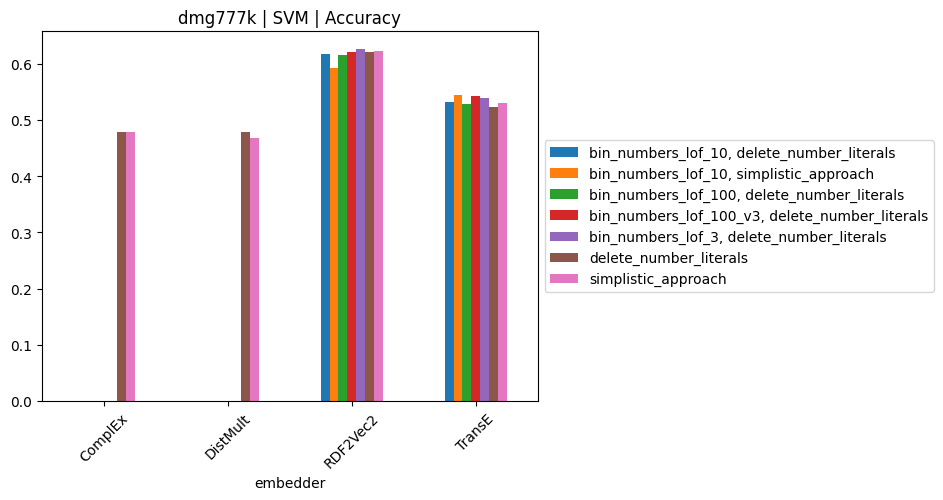

In [15]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((bin_numbers_lof_)[0-9])+.*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((bin_numbers_lof_)[0-9]|simpl|delete_num)+.*')) & (df['embedder'] != "RDF2Vec")],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | Accuracy').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

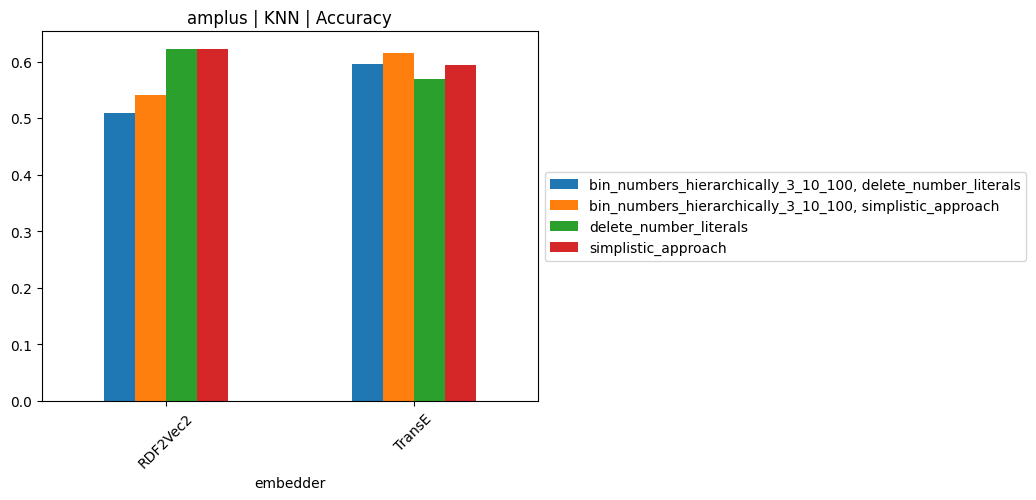

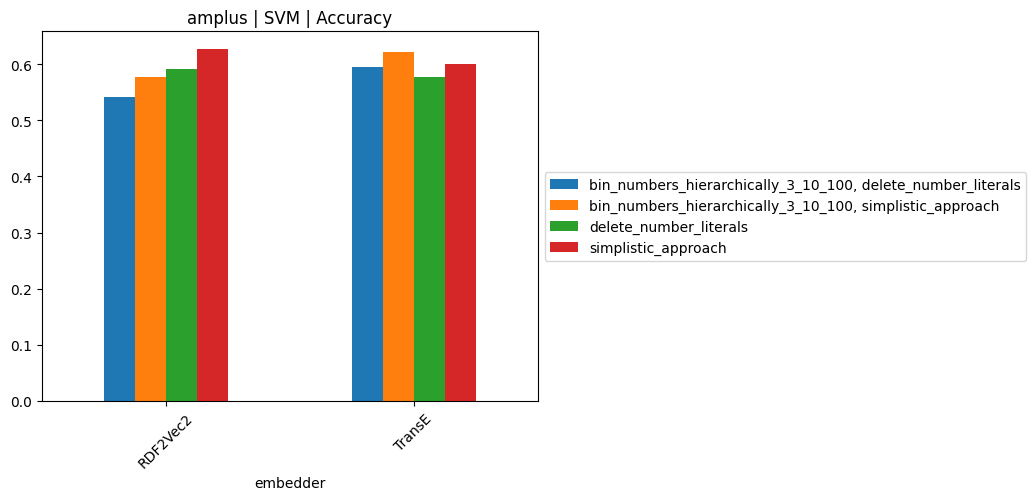

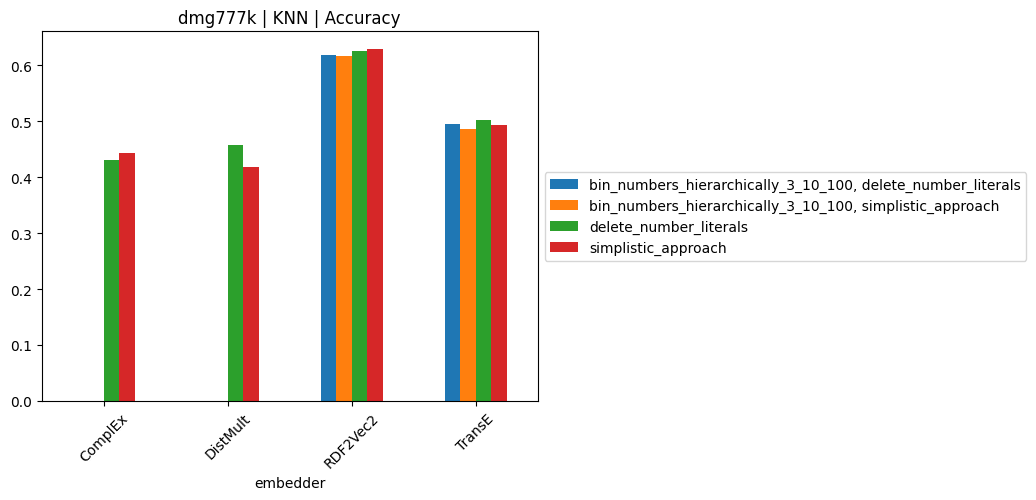

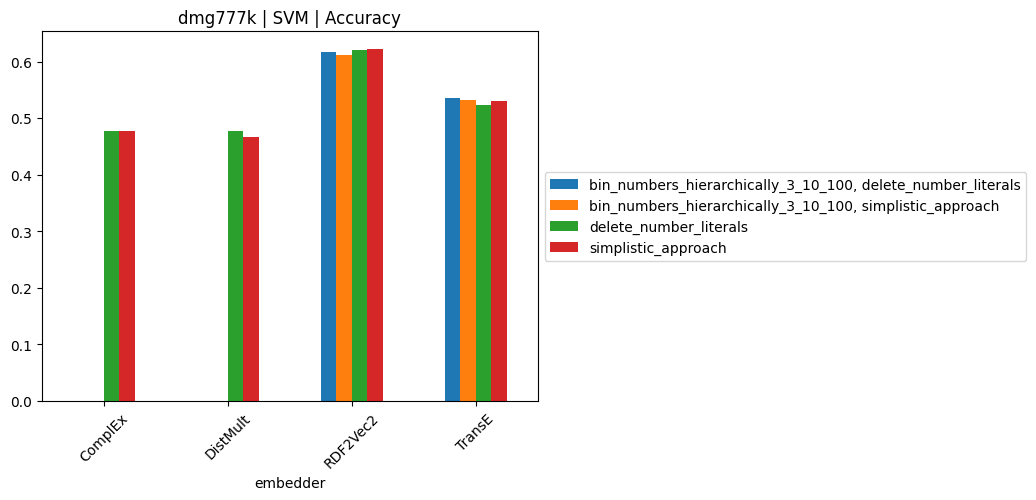

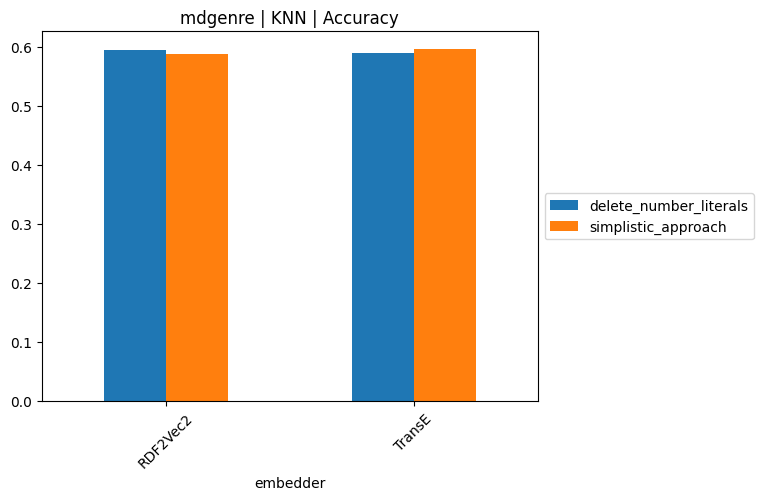

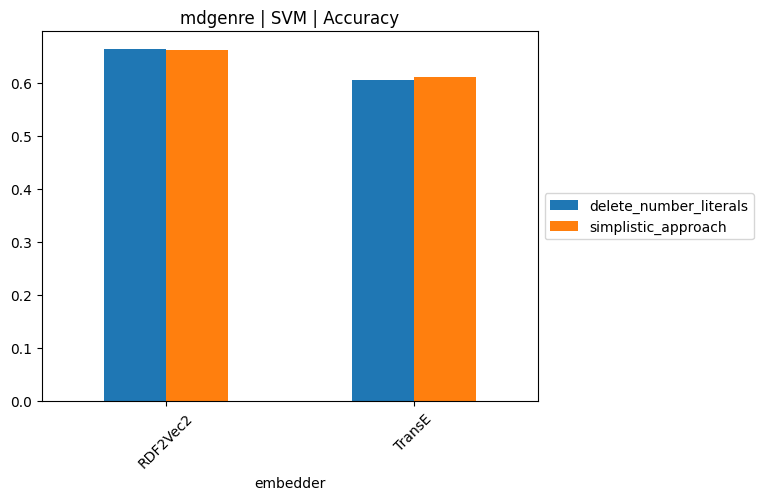

In [16]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((bin_))+.*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((bin_numbers_h)|simpl|delete_num)+.*')) & (df['embedder'] != "RDF2Vec")],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | Accuracy').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

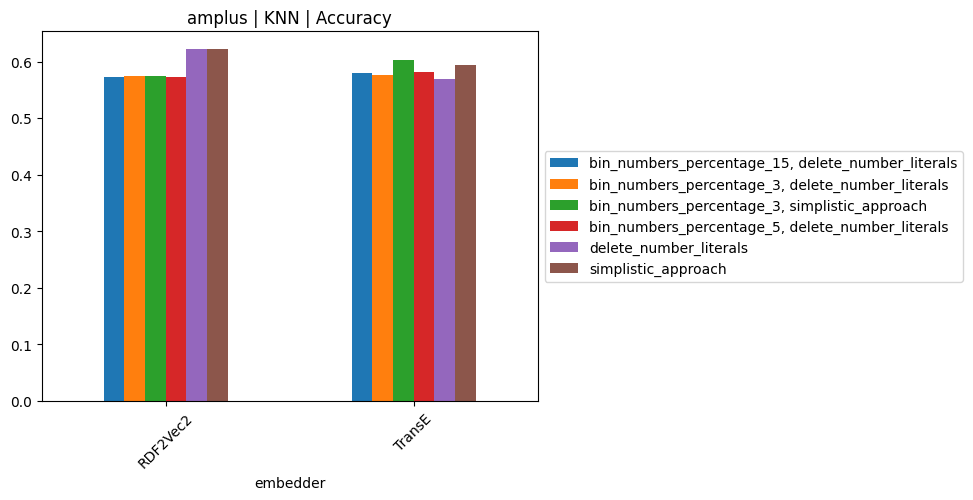

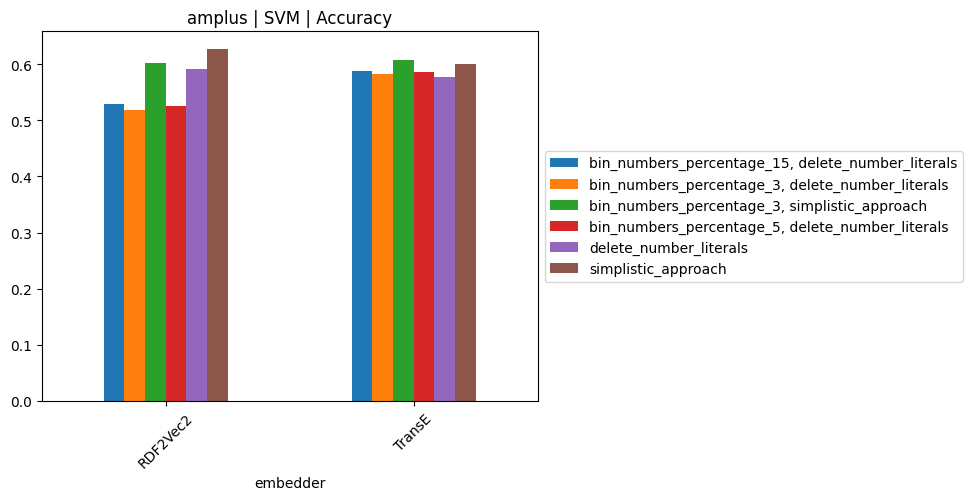

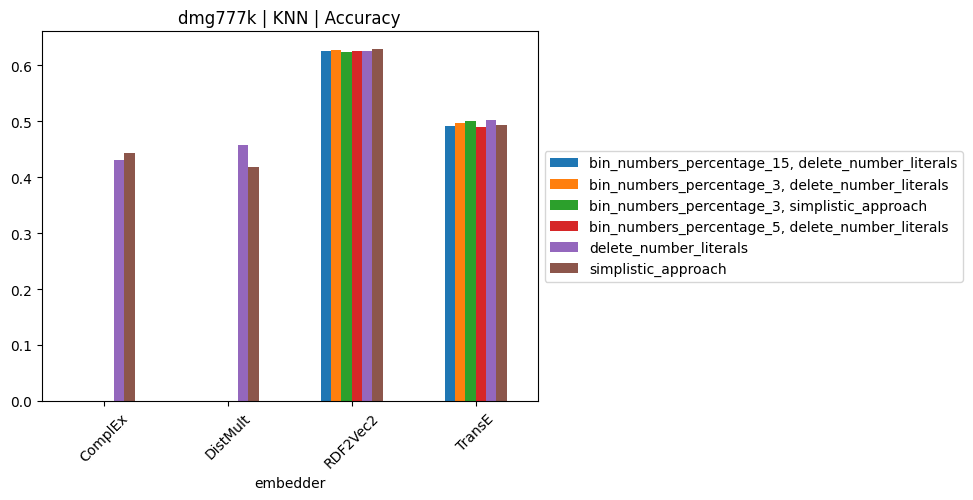

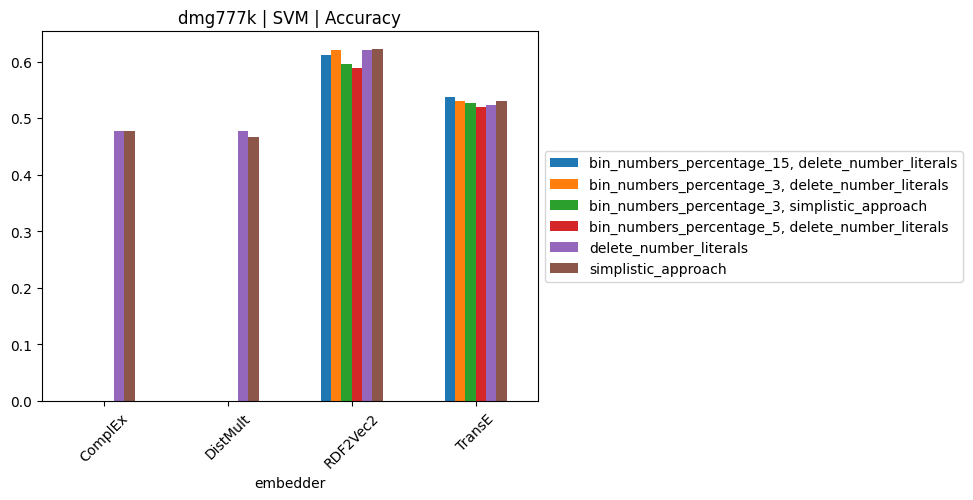

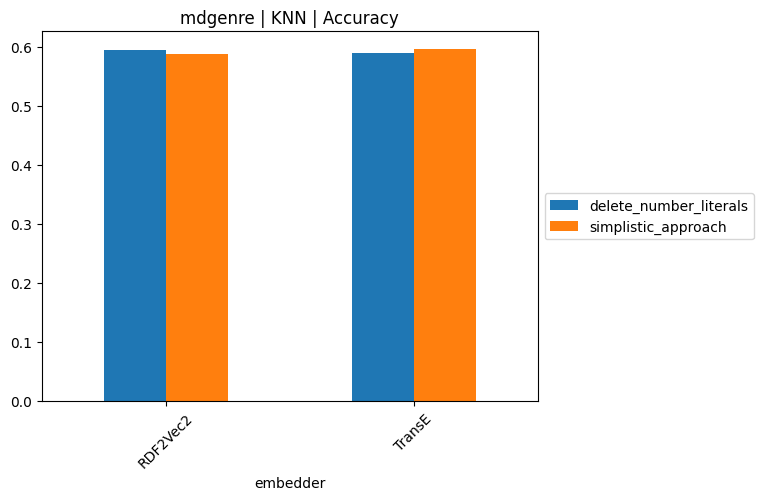

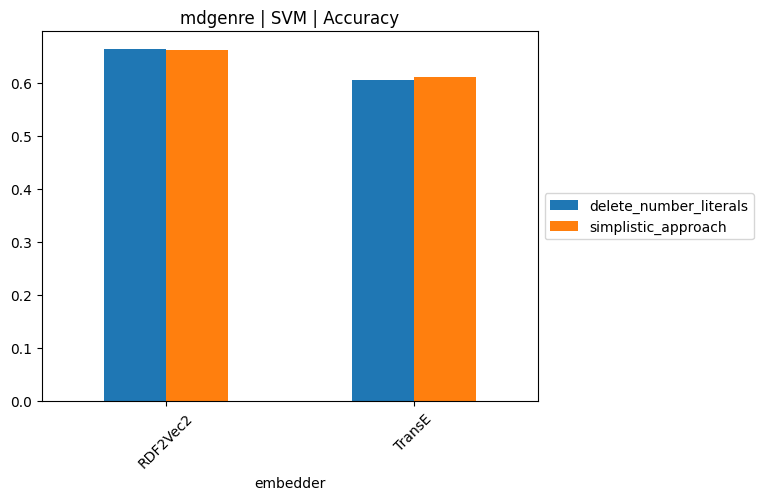

In [17]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((bin_))+.*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((bin_numbers_p)|simpl|delete_num)+.*')) & (df['embedder'] != "RDF2Vec")],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | Accuracy').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

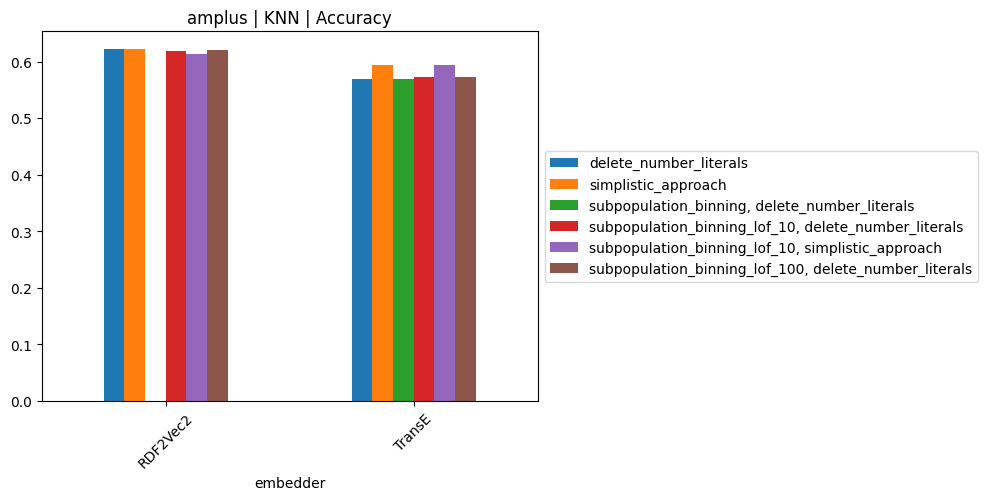

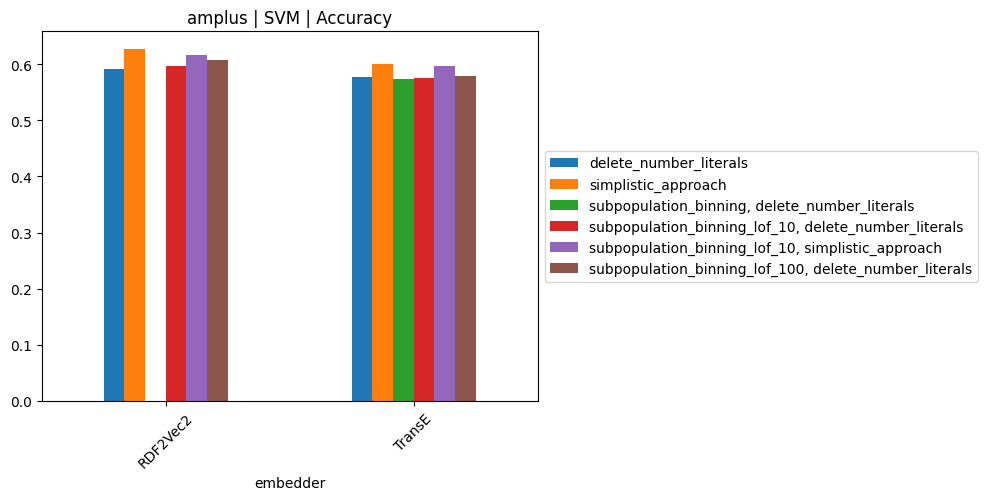

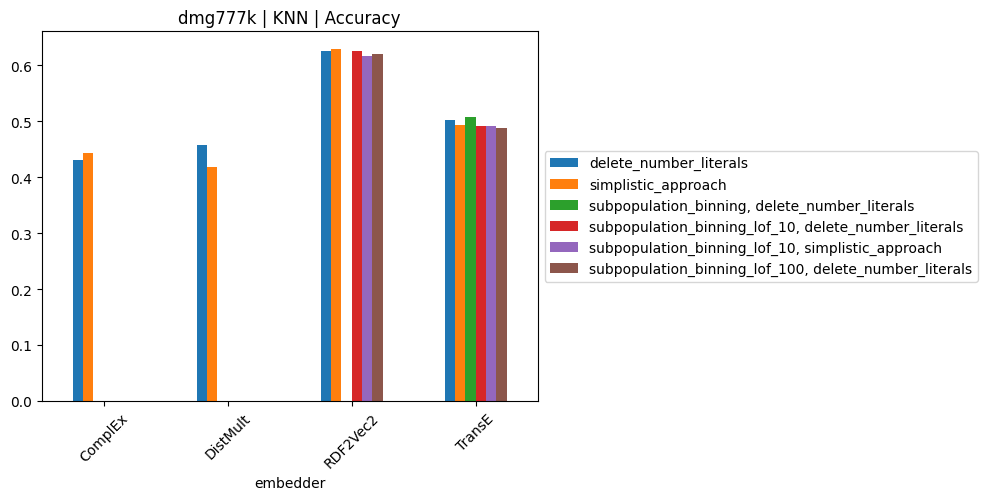

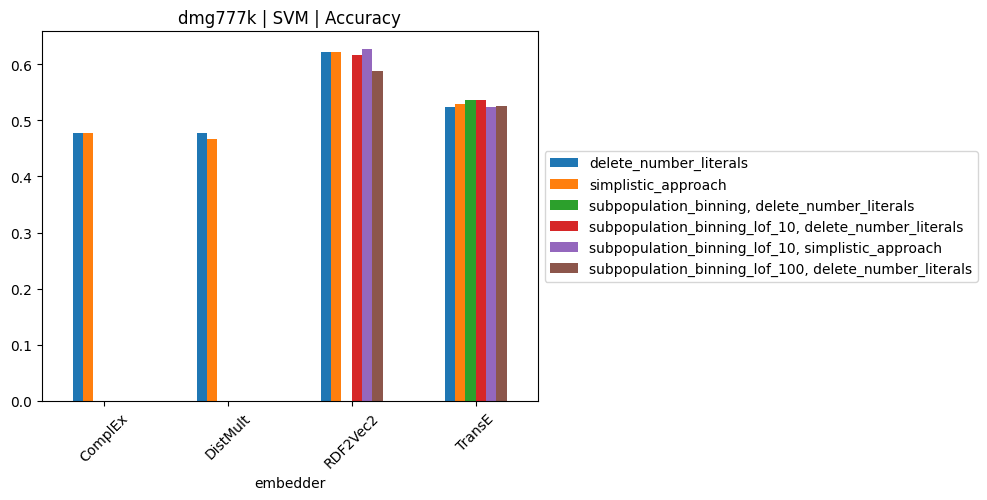

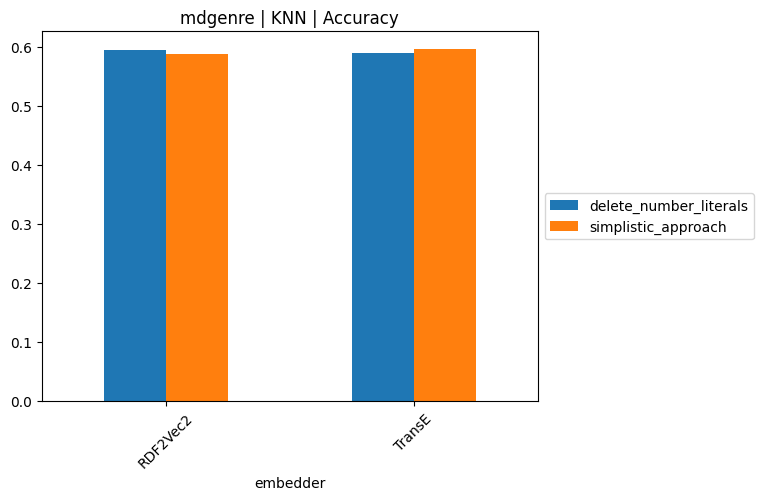

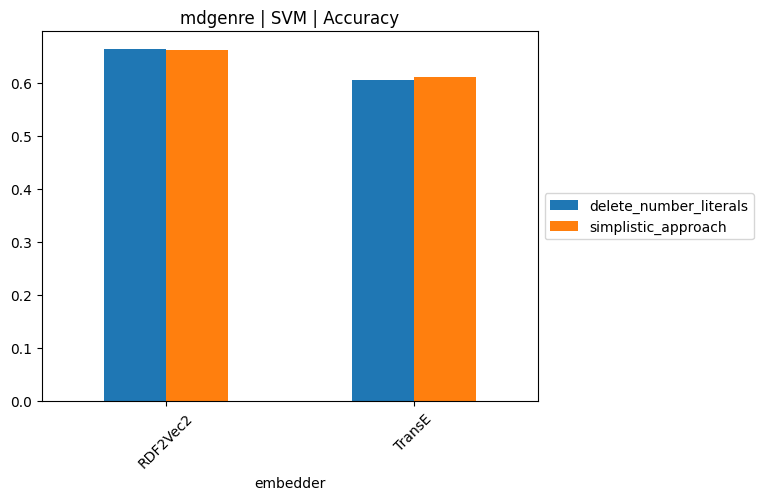

In [18]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((bin_))+.*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(subpop|simpl|delete_num)+.*')) & (df['embedder'] != "RDF2Vec")],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | Accuracy').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

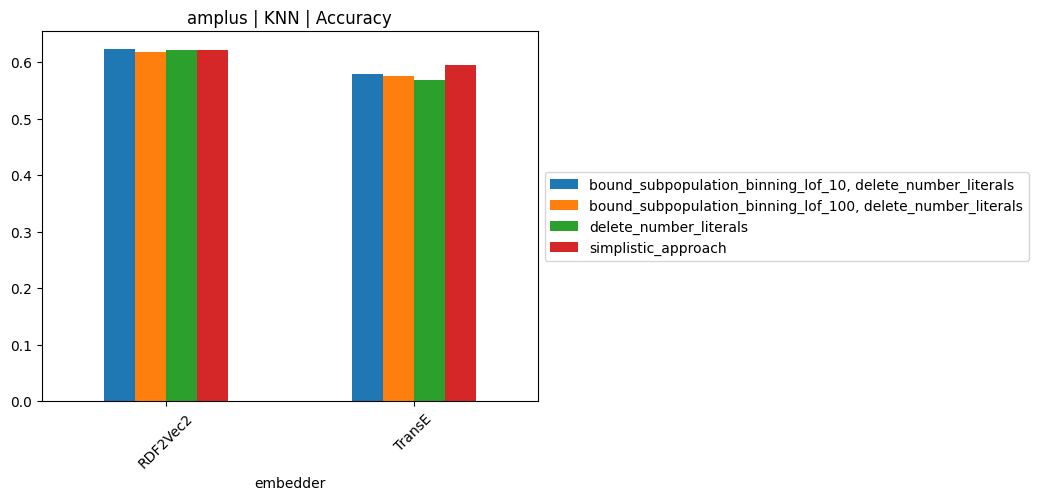

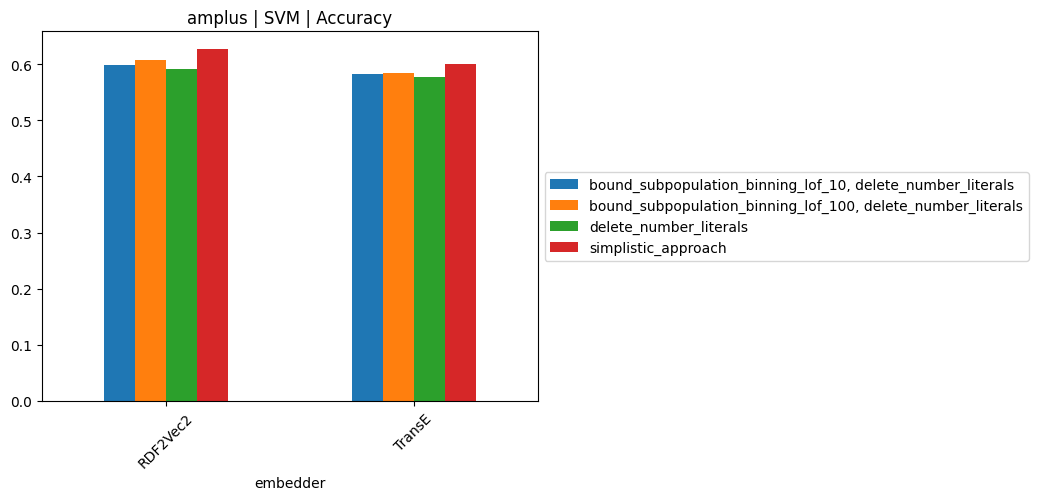

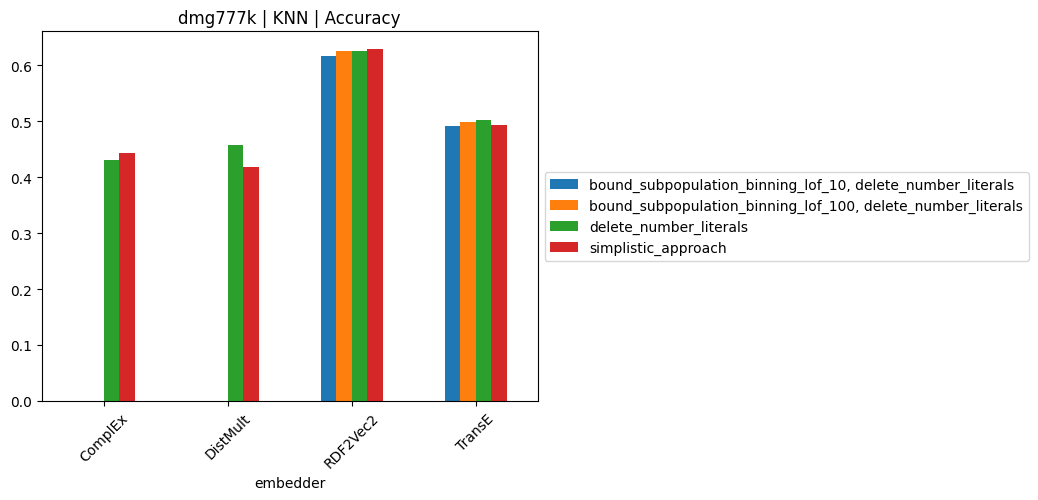

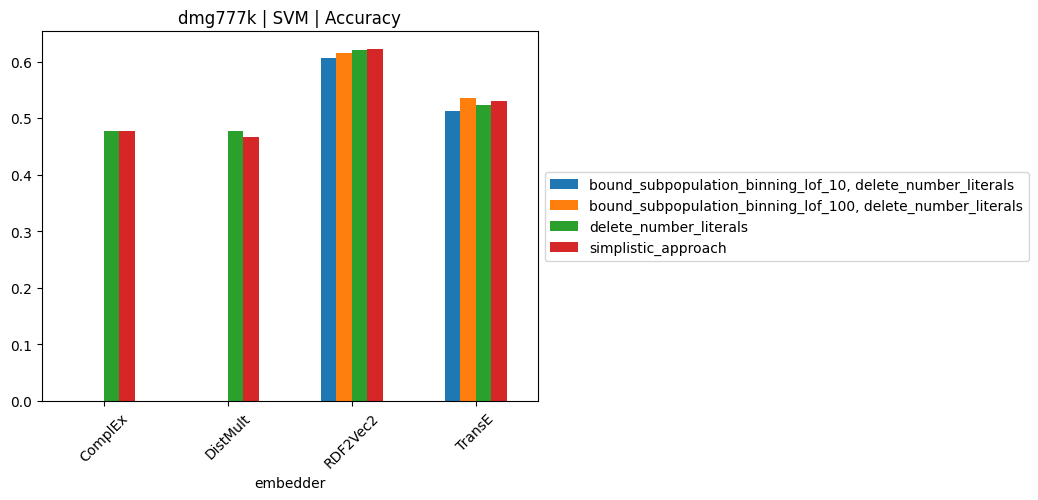

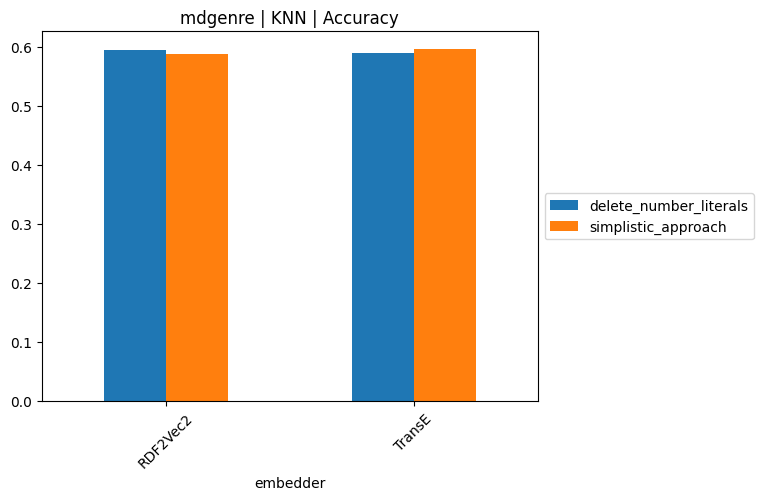

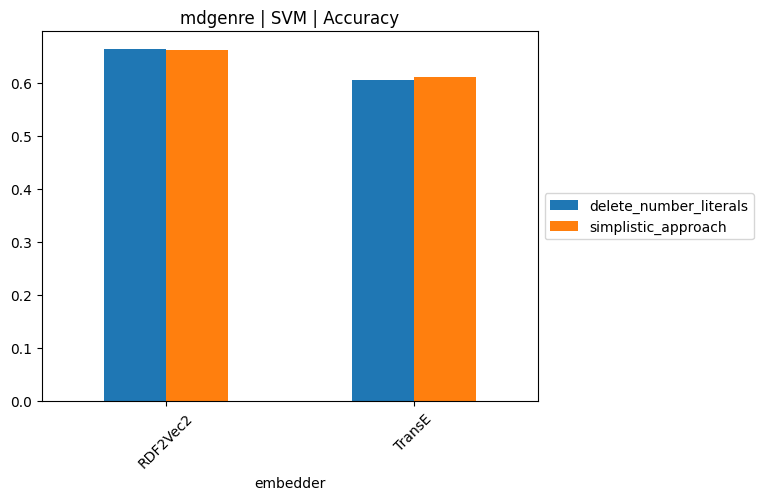

In [19]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((bin_))+.*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((bound)|simpl|delete_num)+.*')) & (df['embedder'] != "RDF2Vec")],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | Accuracy').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

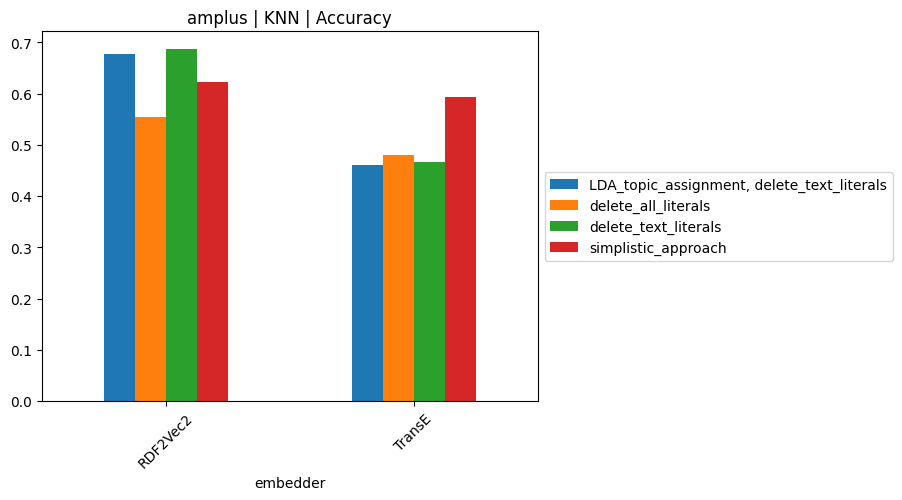

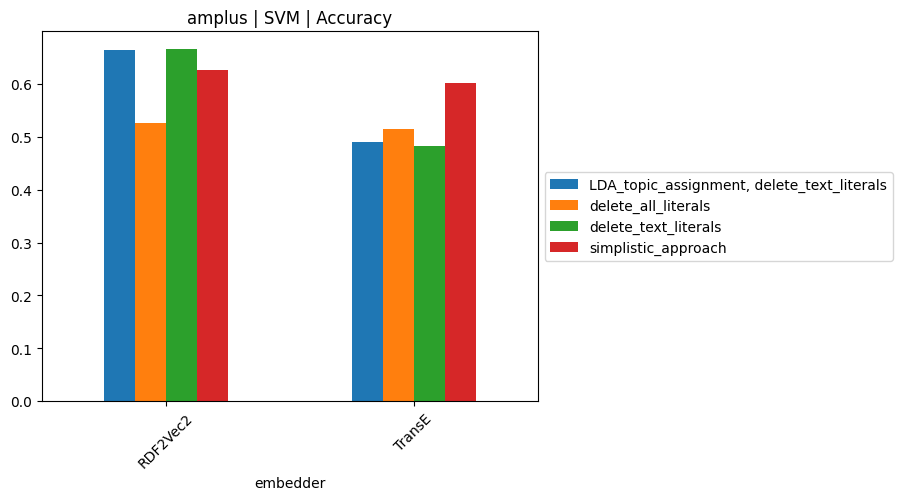

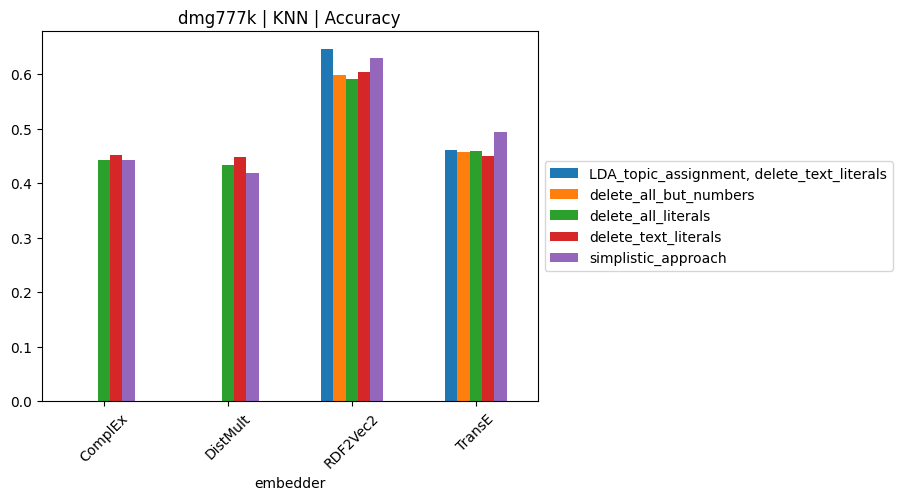

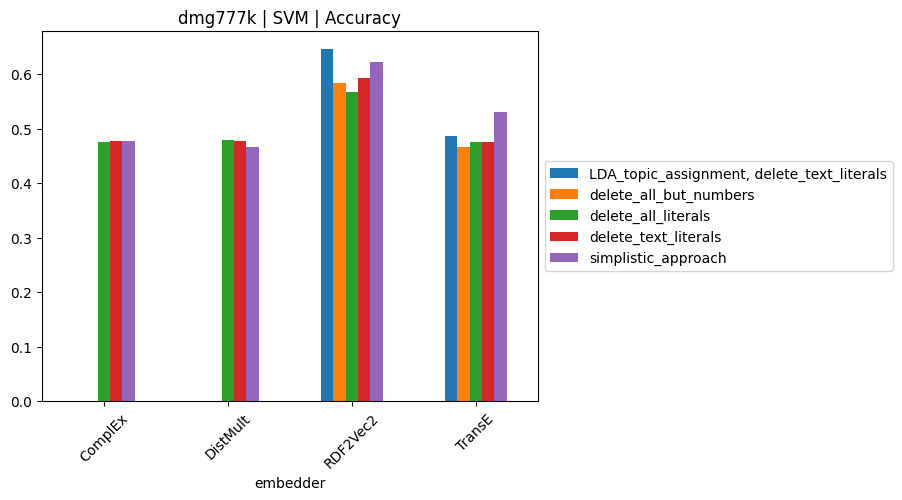

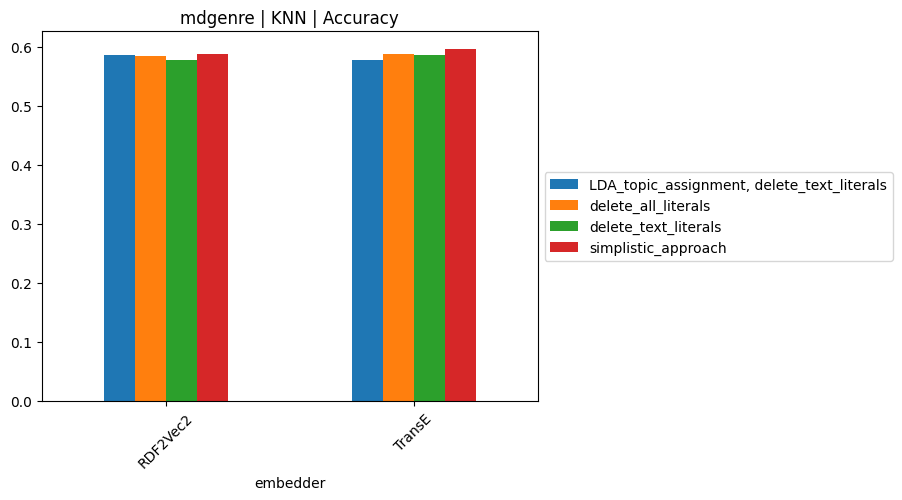

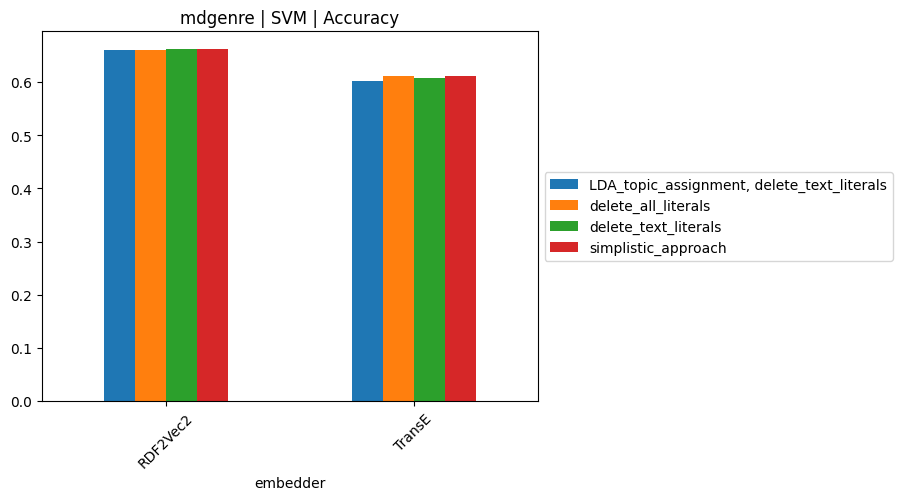

In [20]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((bin_))+.*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((LDA)|simpl|delete_t|delete_a)+.*')) & (df['embedder'] != "RDF2Vec")],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | Accuracy').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

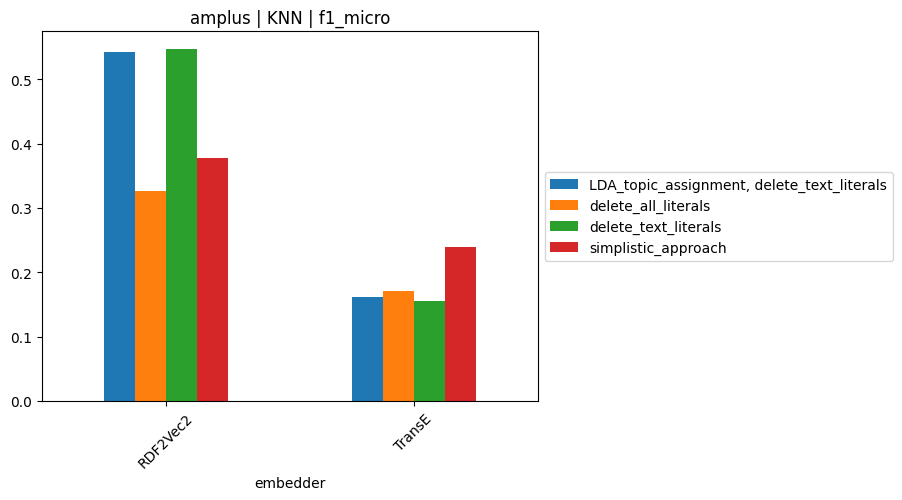

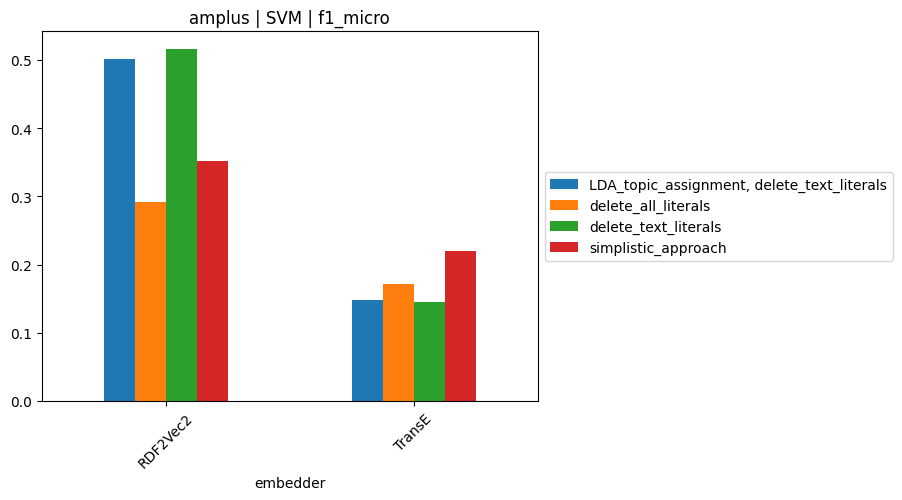

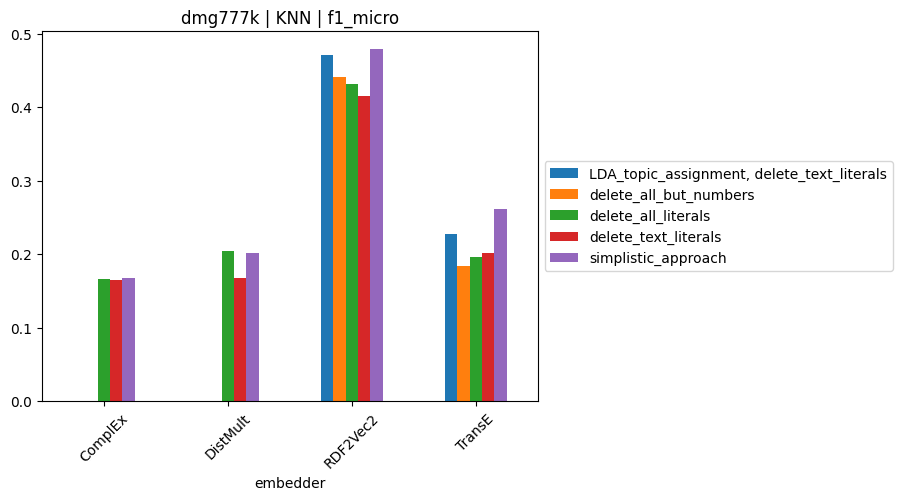

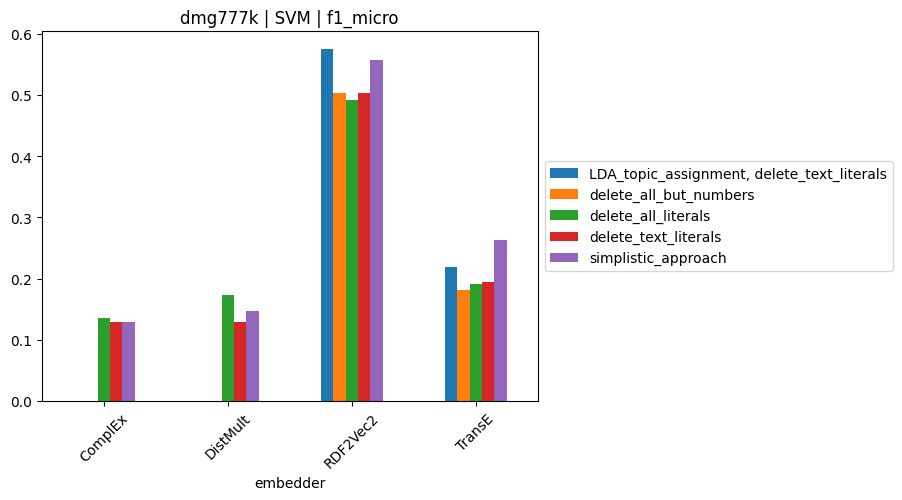

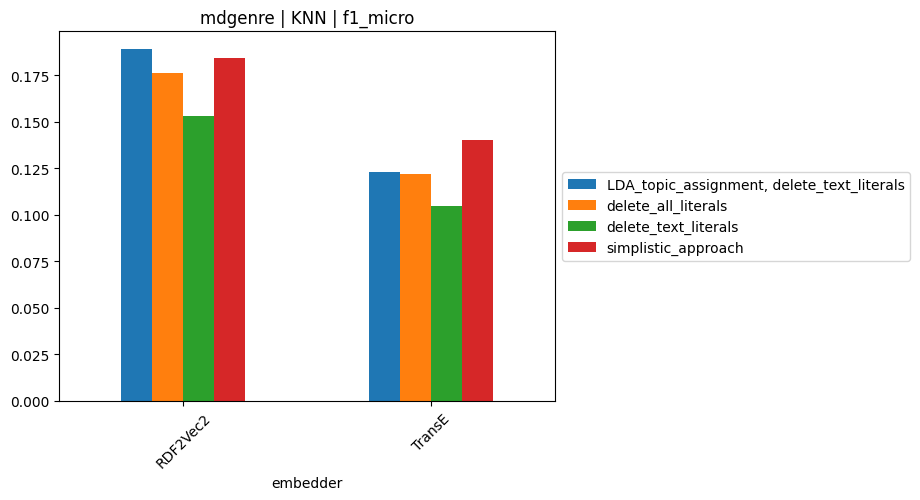

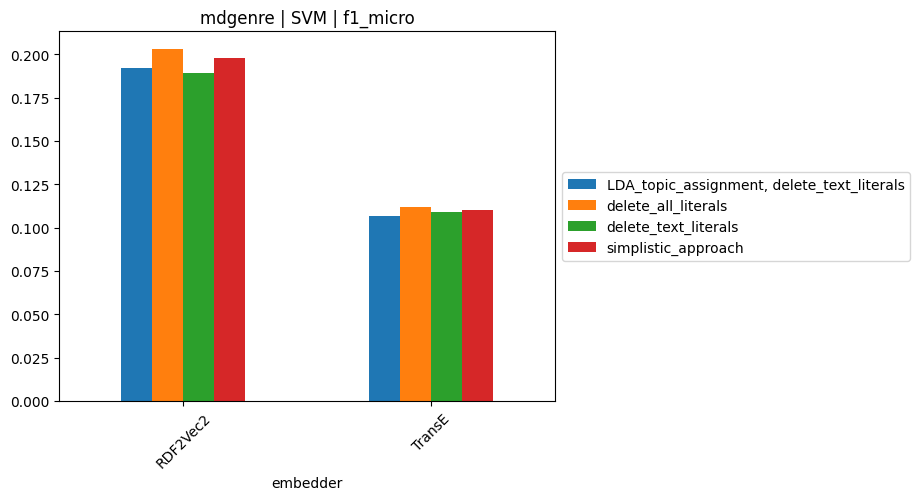

In [21]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((bin_))+.*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'((LDA)|simpl|delete_t|delete_a)+.*')) & (df['embedder'] != "RDF2Vec")],
               index='embedder', columns=['steps'],values='f1_micro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | f1_micro').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Dataframe

In [22]:
df[(df['dataset']=='amplus')&(df['embedder'] == 'RDF2Vec2') ].sort_values(by=['f1_macro'],ascending=False).head(10)

f1_macro  f1_micro dataset eval_method  \
104     0.695     0.549  amplus         KNN   
112     0.687     0.547  amplus         KNN   
0       0.677     0.542  amplus         KNN   
105     0.671     0.511  amplus         SVM   
113     0.666     0.516  amplus         SVM   
1       0.664     0.501  amplus         SVM   
48      0.630     0.394  amplus         KNN   
57      0.629     0.348  amplus         SVM   
36      0.628     0.387  amplus         KNN   
125     0.627     0.352  amplus         SVM   

                                                 steps  embedder  
104                               delete_none_literals  RDF2Vec2  
112                               delete_text_literals  RDF2Vec2  
0           LDA_topic_assignment, delete_text_literals  RDF2Vec2  
105                               delete_none_literals  RDF2Vec2  
113                               delete_text_literals  RDF2Vec2  
1           LDA_topic_assignment, delete_text_literals  RDF2Vec2  
48   bin_numbers_lof_percentage_15, delete_number_l...  RDF2Vec2  
57   bin_numbers_lof_percentage_3, simplistic_approach  RDF2Vec2  
36             bin_numbers_lof_10, simplistic_approach  RDF2Vec2  
125                                simplistic_approach  RDF2Vec2

In [23]:
df[(df['dataset']=='amplus')&(df['embedder'] == 'TransE') ].sort_values(by=['f1_macro'],ascending=False).head(10)

f1_macro  f1_micro dataset eval_method  \
123     0.623     0.276  amplus         SVM   
31      0.622     0.268  amplus         SVM   
122     0.616     0.285  amplus         KNN   
30      0.615     0.297  amplus         KNN   
7       0.609     0.230  amplus         SVM   
75      0.607     0.233  amplus         SVM   
6       0.605     0.264  amplus         KNN   
59      0.604     0.228  amplus         SVM   
39      0.603     0.224  amplus         SVM   
74      0.602     0.250  amplus         KNN   

                                                 steps embedder  
123                    one_entity, simplistic_approach   TransE  
31   bin_numbers_hierarchically_3_10_100, simplisti...   TransE  
122                    one_entity, simplistic_approach   TransE  
30   bin_numbers_hierarchically_3_10_100, simplisti...   TransE  
7                                       bin_numbers_10   TransE  
75       bin_numbers_percentage_3, simplistic_approach   TransE  
6                                       bin_numbers_10   TransE  
59   bin_numbers_lof_percentage_3, simplistic_approach   TransE  
39             bin_numbers_lof_10, simplistic_approach   TransE  
74       bin_numbers_percentage_3, simplistic_approach   TransE

In [24]:
df[(df['dataset']=='dmg777k')&(df['embedder'] == 'RDF2Vec2') ].sort_values(by=['f1_macro'],ascending=False).head(10)

f1_macro  f1_micro  dataset eval_method  \
142     0.646     0.471  dmg777k         KNN   
143     0.646     0.575  dmg777k         SVM   
270     0.630     0.497  dmg777k         KNN   
155     0.629     0.555  dmg777k         SVM   
332     0.629     0.479  dmg777k         KNN   
230     0.628     0.475  dmg777k         KNN   
287     0.627     0.560  dmg777k         SVM   
343     0.627     0.552  dmg777k         SVM   
214     0.627     0.477  dmg777k         KNN   
151     0.627     0.558  dmg777k         SVM   

                                                 steps  embedder  
142         LDA_topic_assignment, delete_text_literals  RDF2Vec2  
143         LDA_topic_assignment, delete_text_literals  RDF2Vec2  
270                               delete_date_literals  RDF2Vec2  
155            bin_numbers_100, delete_number_literals  RDF2Vec2  
332                                simplistic_approach  RDF2Vec2  
230   bin_numbers_percentage_3, delete_number_literals  RDF2Vec2  
287                              delete_image_literals  RDF2Vec2  
343  subpopulation_binning_lof_10, simplistic_approach  RDF2Vec2  
214  bin_numbers_lof_percentage_3, delete_number_li...  RDF2Vec2  
151             bin_numbers_10, delete_number_literals  RDF2Vec2

In [25]:
df[(df['dataset']=='dmg777k')&(df['embedder'] == 'TransE') ].sort_values(by=['f1_macro'],ascending=False).head(10)

f1_macro  f1_micro  dataset eval_method  \
327     0.568     0.331  dmg777k         SVM   
273     0.553     0.275  dmg777k         SVM   
281     0.551     0.282  dmg777k         SVM   
161     0.548     0.285  dmg777k         SVM   
181     0.548     0.300  dmg777k         SVM   
221     0.548     0.285  dmg777k         SVM   
197     0.544     0.264  dmg777k         SVM   
225     0.544     0.271  dmg777k         SVM   
171     0.543     0.266  dmg777k         SVM   
205     0.543     0.265  dmg777k         SVM   

                                                 steps embedder  
327                    one_entity, simplistic_approach   TransE  
273                               delete_date_literals   TransE  
281                                delete_geo_literals   TransE  
161         bin_numbers_100_v3, delete_number_literals   TransE  
181              bin_numbers_3, delete_number_literals   TransE  
221  bin_numbers_lof_percentage_3, simplistic_approach   TransE  
197            bin_numbers_lof_10, simplistic_approach   TransE  
225  bin_numbers_lof_percentage_5, delete_number_li...   TransE  
171         bin_numbers_100_v5, delete_number_literals   TransE  
205     bin_numbers_lof_100_v3, delete_number_literals   TransE

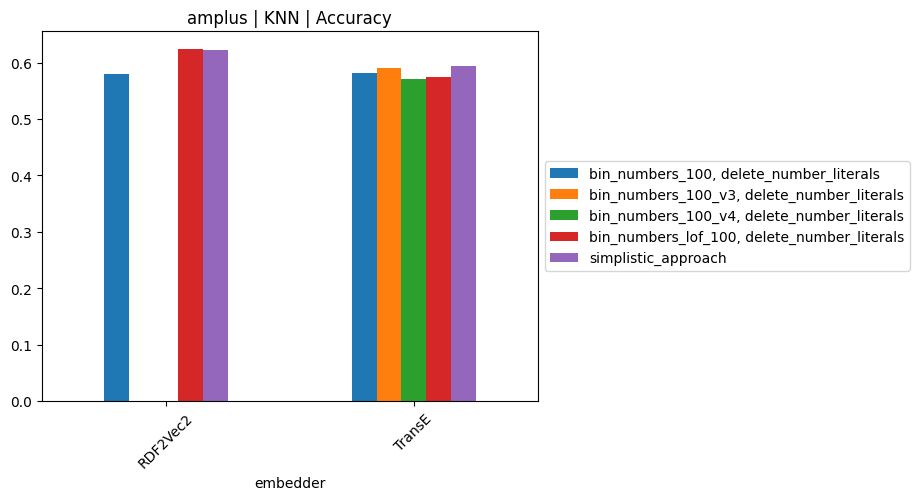

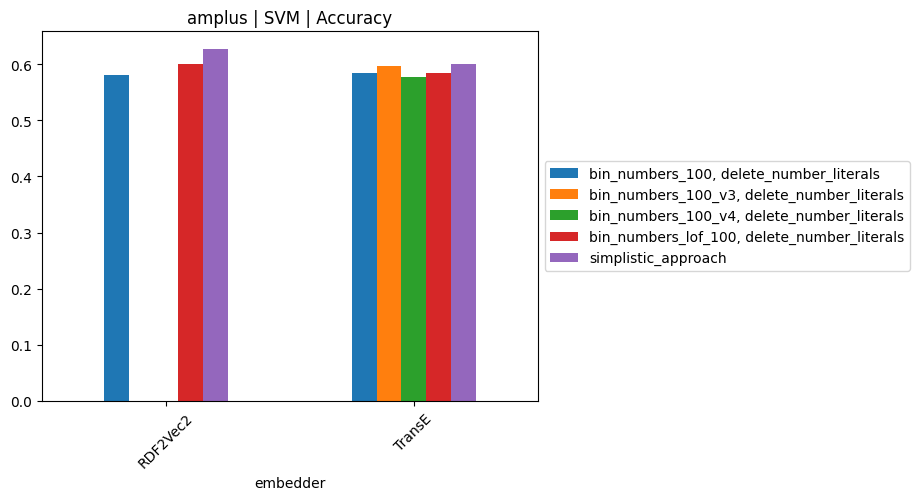

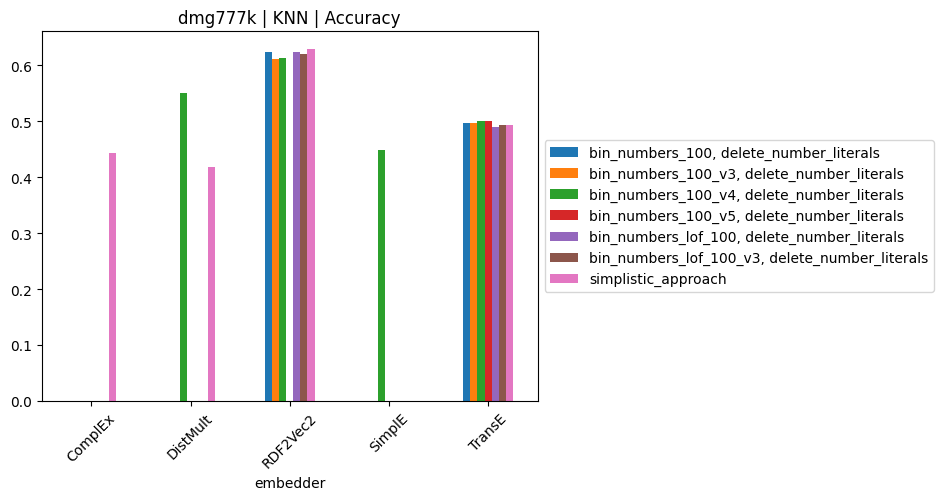

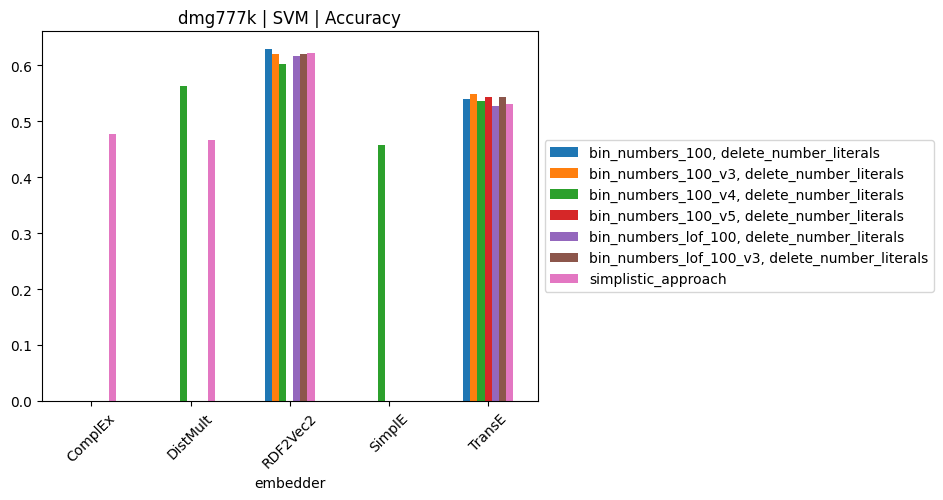

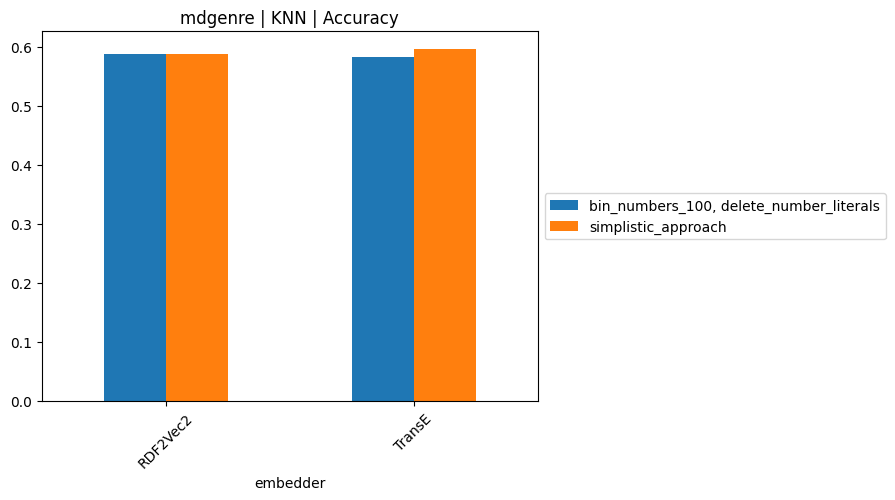

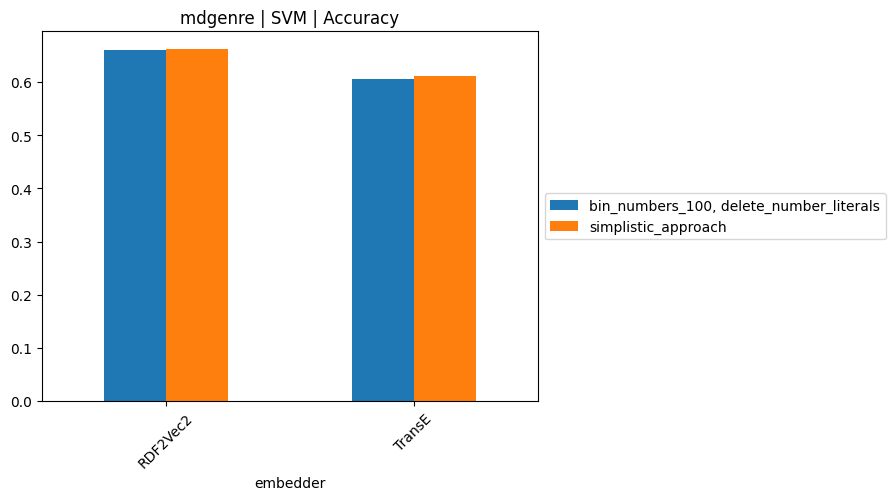

In [26]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(bin_numbers_100|bin_numbers_lof_100|do_nothing|simplistic).*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(bin_numbers_100|bin_numbers_lof_100|do_nothing|simplistic).*'))],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | Accuracy').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

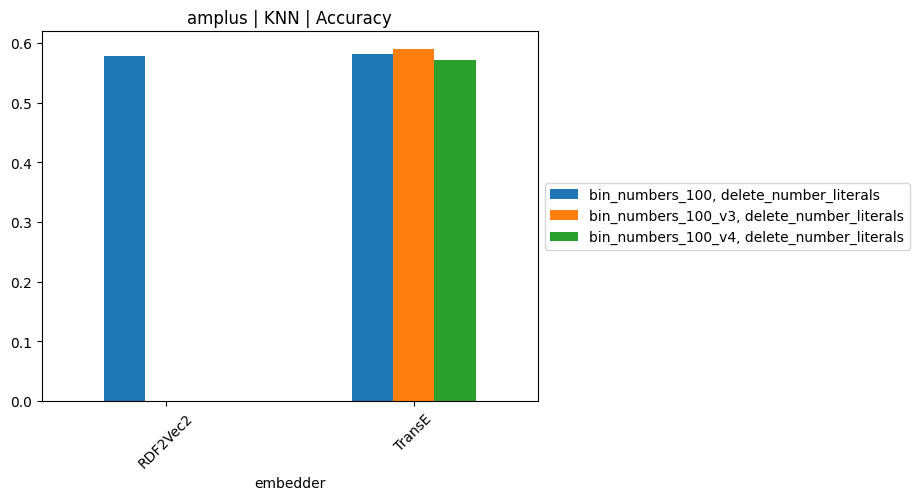

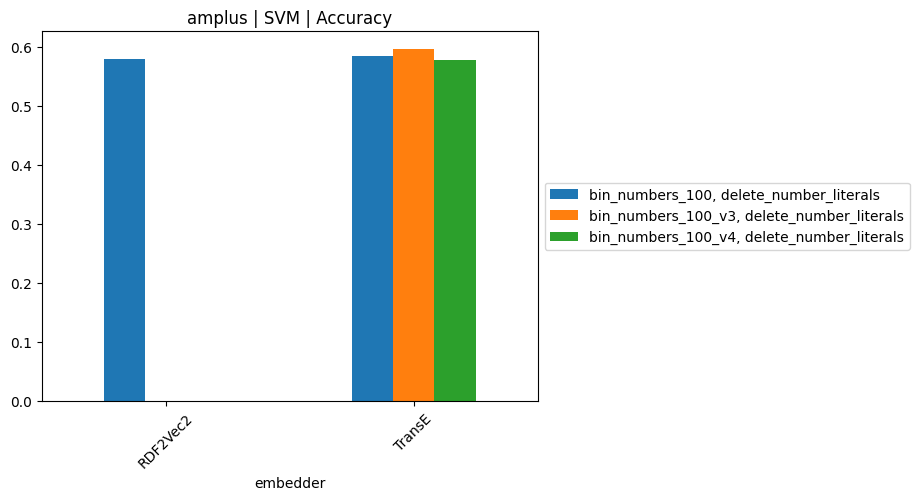

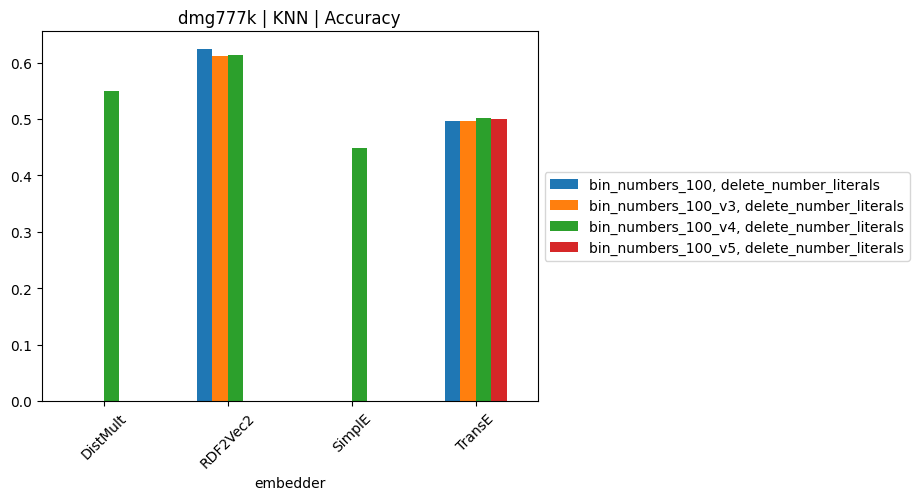

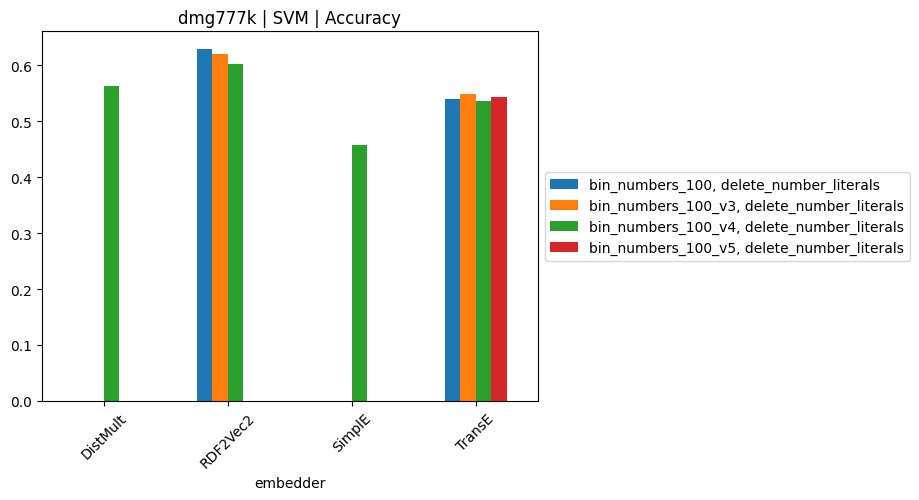

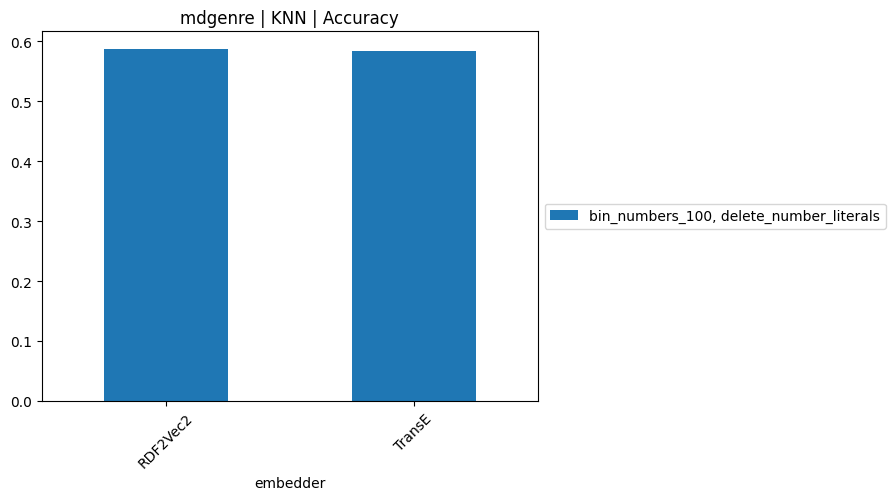

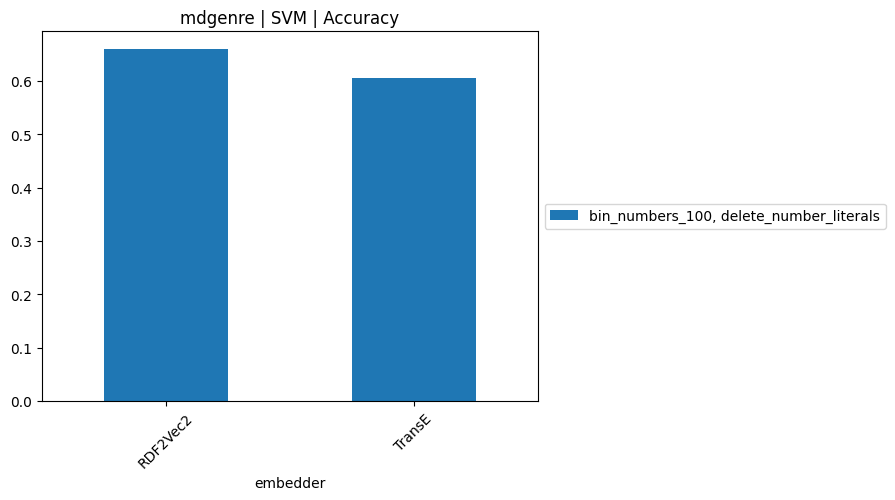

In [27]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(bin_numbers_100).*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(bin_numbers_100).*'))],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | Accuracy').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))